<a href="https://colab.research.google.com/github/juancruzalbornoz/ProyectoDS/blob/main/ProyectoDS_ParteII_AlbornozJuanCruz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Paso 1: Análisis Exploratorio y Modelado Predictivo de la Producción y Calidad del Vino

## 1.a Abstracto (Resumen Ejecutivo)

Este proyecto se enfoca en el análisis de un conjunto de datos sintéticos que simulan la producción de vino, abarcando desde la cosecha hasta la comercialización. El objetivo principal es comprender los factores que influyen en la calidad, el costo y el precio del vino, e identificar oportunidades de optimización. A través de un detallado Análisis Exploratorio de Datos (EDA), se examinan las relaciones entre variables como el tipo de uva, región, condiciones climáticas, procesos de fermentación, crianza en barrica y características fisicoquímicas del vino. Posteriormente, se proponen modelos de aprendizaje automático (clasificación y regresión) para predecir la categoría de calidad del vino y su precio de mercado. Los insights derivados de este análisis buscan ofrecer recomendaciones accionables para mejorar la calidad, gestionar costos y optimizar estrategias de precios en la industria vitivinícola

### 1.a.1 Definición de Objetivo










*   Objetivo Principal: Analizar los datos de producción de vino para identificar los factores clave que impactan la calidad percibida (Puntaje_Calidad, Categoria_Calidad) y la rentabilidad (Precio_Mercado_x_Botella, Costo_Produccion_x_Botella) de los lotes de vino.

*   Objetivos Secundarios:
  1.   Comprender la distribución y las relaciones entre las diferentes variables del proceso de producción.
  2.   Evaluar el impacto de las decisiones de vinificación (ej. tipo de barrica, tiempo de crianza, temperatura de fermentación) en las características finales del vino.
  3.   Explorar diferencias en calidad y precio entre diferentes regiones, tipos de uva y bodegas.
  4.   Proponer estrategias basadas en datos para optimizar la producción hacia vinos de mayor calidad y/o rentabilidad.
  5.   Establecer las bases para desarrollar modelos predictivos que puedan estimar la calidad y el precio del vino basándose en sus características de producción.

### 1.a.2 Contexto Comercial

La industria vitivinícola es altamente competitiva y compleja, donde la calidad del producto final es un diferenciador clave y la eficiencia en costos es crucial para la rentabilidad. Las bodegas enfrentan decisiones constantes sobre qué uvas cultivar o adquirir, en qué regiones, cómo gestionar la cosecha según el clima, qué procesos de fermentación aplicar, y cómo y durante cuánto tiempo realizar la crianza del vino. Cada una de estas decisiones tiene un impacto directo tanto en las características organolépticas del vino (y por ende, su puntaje de calidad) como en los costos de producción. Entender estas relaciones de manera cuantitativa permite a las bodegas tomar decisiones más informadas para posicionar sus productos en el mercado, desde vinos de consumo masivo hasta etiquetas premium y super premium, maximizando el retorno de la inversión.

### 1.a.3 Problema Comercial

Las bodegas buscan maximizar la calidad de sus vinos dentro de ciertas restricciones de costo, o bien, optimizar sus procesos para producir vinos de una calidad objetivo al menor costo posible. La falta de un entendimiento claro sobre cómo las múltiples variables del proceso interactúan y afectan el resultado final puede llevar a:

*   Inconsistencia en la calidad del producto.
*   Costos de producción innecesariamente altos.
*   Dificultad para fijar precios competitivos y rentables.
*   Pérdida de oportunidades para acceder a segmentos de mercado más lucrativos (ej. vinos premium).

Este análisis busca abordar estos problemas proporcionando insights basados en datos sobre los drivers de calidad y costo.

### 1.a.4 Contexto Analítico

Se dispone de un dataset simulado (df_cleaned) con 2100 registros, cada uno representando un lote de vino. El dataset contiene 20 variables (después de la limpieza y antes del feature engineering temporal), incluyendo:

*   **Identificadores y Fechas:** ID_Lote, Fecha_Produccion, Fecha_Cosecha.
*   **Características Categóricas:** Bodega, Region, Tipo_Uva, Clima_Cosecha, Tipo_Barrica.
*   **Parámetros de Proceso Numéricos:** Cantidad_Uva_Kg, Temp_Prom_Cosecha_C, Tiempo_Fermentacion_Dias, Temp_Fermentacion_C, Tiempo_Crianza_Meses.
*   **Características Fisicoquímicas Numéricas:** Nivel_Acidez_pH, Contenido_Alcohol_Pct.
*   **Resultados/Métricas Clave:** Puntaje_Calidad, Botellas_Producidas, Costo_Produccion_x_Botella, Precio_Mercado_x_Botella.
*   **Variable Objetivo Derivada:** Categoria_Calidad (Standard, Premium, Super Premium), creada a partir de Puntaje_Calidad.

El análisis se centrará en técnicas de estadística descriptiva, visualización de datos y, posteriormente, se plantearán modelos de aprendizaje supervisado.

## 1.b Preguntas/Hipótesis a Investigar

*   H1: ¿El Tiempo_Crianza_Meses y el Tipo_Barrica (especialmente roble) tienen una correlación positiva significativa con el Puntaje_Calidad y la Categoria_Calidad?
*   H2: ¿Existe una temperatura de fermentación óptima (Temp_Fermentacion_C) que maximiza el Puntaje_Calidad? (Basado en la fórmula de quality_adjustment).
*   H3: ¿Ciertos Tipo_Uva o Region están asociados consistentemente con vinos de mayor Puntaje_Calidad o Categoria_Calidad?
*   H4: ¿El Costo_Produccion_x_Botella aumenta con el Tiempo_Crianza_Meses y la Cantidad_Uva_Kg?
*   H5: ¿El Precio_Mercado_x_Botella está fuertemente correlacionado con el Puntaje_Calidad y el Costo_Produccion_x_Botella?
*   H6: ¿Las condiciones climáticas durante la cosecha (Clima_Cosecha, Temp_Prom_Cosecha_C) muestran alguna relación observable con el Puntaje_Calidad?
*   H7: ¿Los vinos de categoría 'Super Premium' se diferencian significativamente de los 'Standard' en términos de variables de proceso como Tiempo_Crianza_Meses o Tipo_Barrica?

# Paso 2: Configuracion del entorno

## 2.a Configuración del Entorno

In [29]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Configuración general para los gráficos (opcional, para mejorar la estética)
# sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Tamaño de figura por defecto

## 2.b Configuración del Dataset

In [30]:
# --- Parámetros de Configuración ---
num_rows = 2100
start_date = datetime(2020, 1, 1)
end_date = datetime(2024, 12, 31)
null_probability = 0.08 # Probabilidad de que un valor sea nulo en columnas seleccionadas

# --- Listas de Valores Categóricos ---
wineries = [f'Bodega_{chr(65+i)}' for i in range(10)] # Bodega_A, Bodega_B, ...
regions = ['Mendoza', 'San Juan', 'Salta', 'La Rioja', 'Patagonia']
grape_types = ['Malbec', 'Cabernet Sauvignon', 'Bonarda', 'Syrah', 'Merlot', 'Chardonnay', 'Torrontés']
weather_conditions = ['Soleado', 'Nublado', 'Lluvioso', 'Variable']
barrel_types = ['Roble Francés', 'Roble Americano', 'Acero Inoxidable', 'Sin Crianza']

# --- Generación de Datos ---
data = {}

# IDs únicos
data['ID_Lote'] = range(1, num_rows + 1)

# Fechas
production_dates = [start_date + timedelta(days=random.randint(0, (end_date - start_date).days)) for _ in range(num_rows)]
data['Fecha_Produccion'] = production_dates
# La cosecha debe ser anterior a la producción
data['Fecha_Cosecha'] = [d - timedelta(days=random.randint(30, 180)) for d in production_dates]

# Datos Categóricos
data['Bodega'] = random.choices(wineries, k=num_rows)
data['Region'] = random.choices(regions, k=num_rows)
data['Tipo_Uva'] = random.choices(grape_types, k=num_rows)
data['Clima_Cosecha'] = random.choices(weather_conditions, k=num_rows)

# Datos Numéricos (con algo de lógica y aleatoriedad)
data['Cantidad_Uva_Kg'] = np.random.uniform(1000, 15000, num_rows).round(2)
data['Temp_Prom_Cosecha_C'] = np.random.uniform(15, 30, num_rows).round(1)
data['Tiempo_Fermentacion_Dias'] = np.random.randint(7, 25, num_rows)
data['Temp_Fermentacion_C'] = np.random.uniform(18, 32, num_rows).round(1)

# Crianza y tipo de barril (con cierta correlación)
aging_times = []
barrel_selection = []
for _ in range(num_rows):
    barrel = random.choice(barrel_types)
    barrel_selection.append(barrel)
    if barrel in ['Acero Inoxidable', 'Sin Crianza']:
        aging_times.append(0) # Sin crianza en madera
    else:
        aging_times.append(random.randint(3, 24)) # Meses de crianza
data['Tiempo_Crianza_Meses'] = aging_times
data['Tipo_Barrica'] = barrel_selection

data['Nivel_Acidez_pH'] = np.random.uniform(3.0, 4.2, num_rows).round(2)
data['Contenido_Alcohol_Pct'] = np.random.uniform(11.5, 15.5, num_rows).round(1)

# Calidad (influenciada ligeramente por otros factores para realismo)
base_quality = np.random.randint(75, 95, num_rows)
quality_adjustment = (np.array(data['Tiempo_Crianza_Meses']) / 6) - abs(np.array(data['Temp_Fermentacion_C']) - 25) / 5 # Ajuste simple
data['Puntaje_Calidad'] = np.clip(base_quality + quality_adjustment, 70, 100).round(0).astype(int) # Puntaje 70-100

# Producción y Costos/Precios
yield_factor = np.random.uniform(0.8, 1.1, num_rows)
data['Botellas_Producidas'] = (data['Cantidad_Uva_Kg'] * yield_factor).round(0).astype(int)

base_cost = np.random.uniform(1.5, 5.0, num_rows)
cost_adjustment = (np.array(data['Tiempo_Crianza_Meses']) * 0.15) + (np.array(data['Cantidad_Uva_Kg']) / 5000) # Más crianza/volumen = más costo
data['Costo_Produccion_x_Botella'] = (base_cost + cost_adjustment).round(2)

base_price_factor = np.random.uniform(1.8, 3.5, num_rows)
price_adjustment = (np.array(data['Puntaje_Calidad']) - 80) * 0.1 + (np.array(data['Tiempo_Crianza_Meses']) * 0.05)
precio_calculado = (np.array(data['Costo_Produccion_x_Botella']) * base_price_factor + price_adjustment).round(2)
precio_minimo = np.array(data['Costo_Produccion_x_Botella']) * 1.1
data['Precio_Mercado_x_Botella'] = np.maximum(precio_calculado, precio_minimo) # Precio siempre >= 110% del costo

# --- Crear DataFrame ---
df = pd.DataFrame(data)

# --- Introducir Valores Nulos (NaN) ---
cols_with_nulls = [
    'Temp_Prom_Cosecha_C',
    'Nivel_Acidez_pH',
    'Tipo_Barrica',
    'Precio_Mercado_x_Botella'
]

for col in cols_with_nulls:
    if pd.api.types.is_integer_dtype(df[col]):
        if not pd.api.types.is_float_dtype(df[col]):
            df[col] = df[col].astype(float)

    mask = np.random.choice([True, False], size=num_rows, p=[null_probability, 1 - null_probability])
    if pd.api.types.is_object_dtype(df[col]):
        df.loc[mask, col] = None
    else:
        df.loc[mask, col] = np.nan


# --- Añadir Columna Derivada para Clasificación ---
bins = [69, 84, 92, 101]
labels = ['Standard', 'Premium', 'Super Premium']
df['Categoria_Calidad'] = pd.cut(df['Puntaje_Calidad'], bins=bins, labels=labels, right=True)

print("DataFrame generado exitosamente. Iniciando inspección...\n")

DataFrame generado exitosamente. Iniciando inspección...



# Paso 3: Inspección Inicial Detallada

## 3.a Dimensiones del DataFrame

In [31]:
print("--- 1. Dimensiones del DataFrame ---")
print(df.shape)

--- 1. Dimensiones del DataFrame ---
(2100, 20)


Esto nos indica que tenemos 2100 filas (lotes de vino) y 20 columnas (características).

## 3.b Información del DataFrame: Tipos de datos y conteo de no nulos

In [32]:
print("\n--- 2. Información del DataFrame (Tipos de datos y Nulos) ---")
df.info()


--- 2. Información del DataFrame (Tipos de datos y Nulos) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID_Lote                     2100 non-null   int64         
 1   Fecha_Produccion            2100 non-null   datetime64[ns]
 2   Fecha_Cosecha               2100 non-null   datetime64[ns]
 3   Bodega                      2100 non-null   object        
 4   Region                      2100 non-null   object        
 5   Tipo_Uva                    2100 non-null   object        
 6   Clima_Cosecha               2100 non-null   object        
 7   Cantidad_Uva_Kg             2100 non-null   float64       
 8   Temp_Prom_Cosecha_C         1946 non-null   float64       
 9   Tiempo_Fermentacion_Dias    2100 non-null   int64         
 10  Temp_Fermentacion_C         2100 non-null   float64      

Observamos los tipos de datos:

*   int64 para IDs, cantidades, puntajes.

*   datetime64[ns] para las fechas, lo cual es correcto.
*   object para las columnas categóricas de texto.

*   float64 para las métricas numéricas con decimales.
*   category para Categoria_Calidad, que es eficiente.

*   También vemos que las columnas Temp_Prom_Cosecha_C, Tipo_Barrica, Nivel_Acidez_pH, y Precio_Mercado_x_Botella tienen valores nulos, como se esperaba.












## 3.c Estadísticas Descriptivas para Columnas Numéricas

In [33]:
print("\n--- 3. Estadísticas Descriptivas (Columnas Numéricas) ---")
print(df.describe().to_markdown())


--- 3. Estadísticas Descriptivas (Columnas Numéricas) ---
|       |   ID_Lote | Fecha_Produccion              | Fecha_Cosecha                 |   Cantidad_Uva_Kg |   Temp_Prom_Cosecha_C |   Tiempo_Fermentacion_Dias |   Temp_Fermentacion_C |   Tiempo_Crianza_Meses |   Nivel_Acidez_pH |   Contenido_Alcohol_Pct |   Puntaje_Calidad |   Botellas_Producidas |   Costo_Produccion_x_Botella |   Precio_Mercado_x_Botella |
|:------|----------:|:------------------------------|:------------------------------|------------------:|----------------------:|---------------------------:|----------------------:|-----------------------:|------------------:|------------------------:|------------------:|----------------------:|-----------------------------:|---------------------------:|
| count |  2100     | 2100                          | 2100                          |           2100    |            1946       |                 2100       |            2100       |             2100       |       1927       

Esto nos da una buena idea de la distribución de cada variable numérica:

*   El ID_Lote va de 1 a 2100.
*   Cantidad_Uva_Kg tiene un rango amplio, como se esperaba.

*   Las temperaturas, tiempos, pH, alcohol, etc., están dentro de los rangos definidos en la generación.
*   Puntaje_Calidad varía entre 70 y 100.

*   Los costos y precios también muestran una variabilidad razonable.
*   Notamos que el count para las columnas con nulos es menor que 2100.

## 3.d Conteos para Columnas Categóricas

In [34]:
print("\n--- 4.a Estadísticas Descriptivas (Columnas Categóricas tipo 'object') ---")
print(df.describe(include=['object', 'category']).to_markdown()) # Incluimos 'category' para Categoria_Calidad

print("\n--- 4.b Conteos para 'Categoria_Calidad' (tipo 'category') ---")
print(df['Categoria_Calidad'].value_counts().to_markdown())


--- 4.a Estadísticas Descriptivas (Columnas Categóricas tipo 'object') ---
|        | Bodega   | Region    | Tipo_Uva   | Clima_Cosecha   | Tipo_Barrica   | Categoria_Calidad   |
|:-------|:---------|:----------|:-----------|:----------------|:---------------|:--------------------|
| count  | 2100     | 2100      | 2100       | 2100            | 1928           | 2100                |
| unique | 10       | 5         | 7          | 4               | 4              | 3                   |
| top    | Bodega_D | Patagonia | Bonarda    | Nublado         | Roble Francés  | Standard            |
| freq   | 229      | 443       | 320        | 563             | 498            | 993                 |

--- 4.b Conteos para 'Categoria_Calidad' (tipo 'category') ---
| Categoria_Calidad   |   count |
|:--------------------|--------:|
| Standard            |     993 |
| Premium             |     866 |
| Super Premium       |     241 |


*   Vemos el número de valores únicos para cada columna categórica (e.g., 10 bodegas, 5 regiones).
*   La categoría más frecuente (top) y su frecuencia (freq) nos dan una idea de la distribución. Por ejemplo, Bodega_C podría ser la más común en esta generación, o Mendoza la región más frecuente.

*   Para Tipo_Barrica, el count es menor a 2100 debido a los nulos.
*   Categoria_Calidad muestra una distribución donde 'Standard' es la más común, seguida de 'Premium' y luego 'Super Premium', lo cual es esperable por cómo se definieron los bins.





## 3.e Cantidad y Porcentaje de Valores Nulos por Columna

In [35]:
print("\n--- 5. Valores Nulos por Columna ---")
null_counts = df.isnull().sum()
null_percentages = (df.isnull().mean() * 100).round(2)
null_summary = pd.DataFrame({'Nulos': null_counts, 'Porcentaje_Nulos (%)': null_percentages})
print(null_summary[null_summary['Nulos'] > 0].to_markdown())


--- 5. Valores Nulos por Columna ---
|                          |   Nulos |   Porcentaje_Nulos (%) |
|:-------------------------|--------:|-----------------------:|
| Temp_Prom_Cosecha_C      |     154 |                   7.33 |
| Tipo_Barrica             |     172 |                   8.19 |
| Nivel_Acidez_pH          |     173 |                   8.24 |
| Precio_Mercado_x_Botella |     163 |                   7.76 |


Esto confirma que las columnas seleccionadas (Temp_Prom_Cosecha_C, Nivel_Acidez_pH, Tipo_Barrica, Precio_Mercado_x_Botella) tienen valores nulos, y el porcentaje está alrededor del 8% que establecimos en null_probability. Las demás columnas no tienen nulos.

## 3.d Muestreo

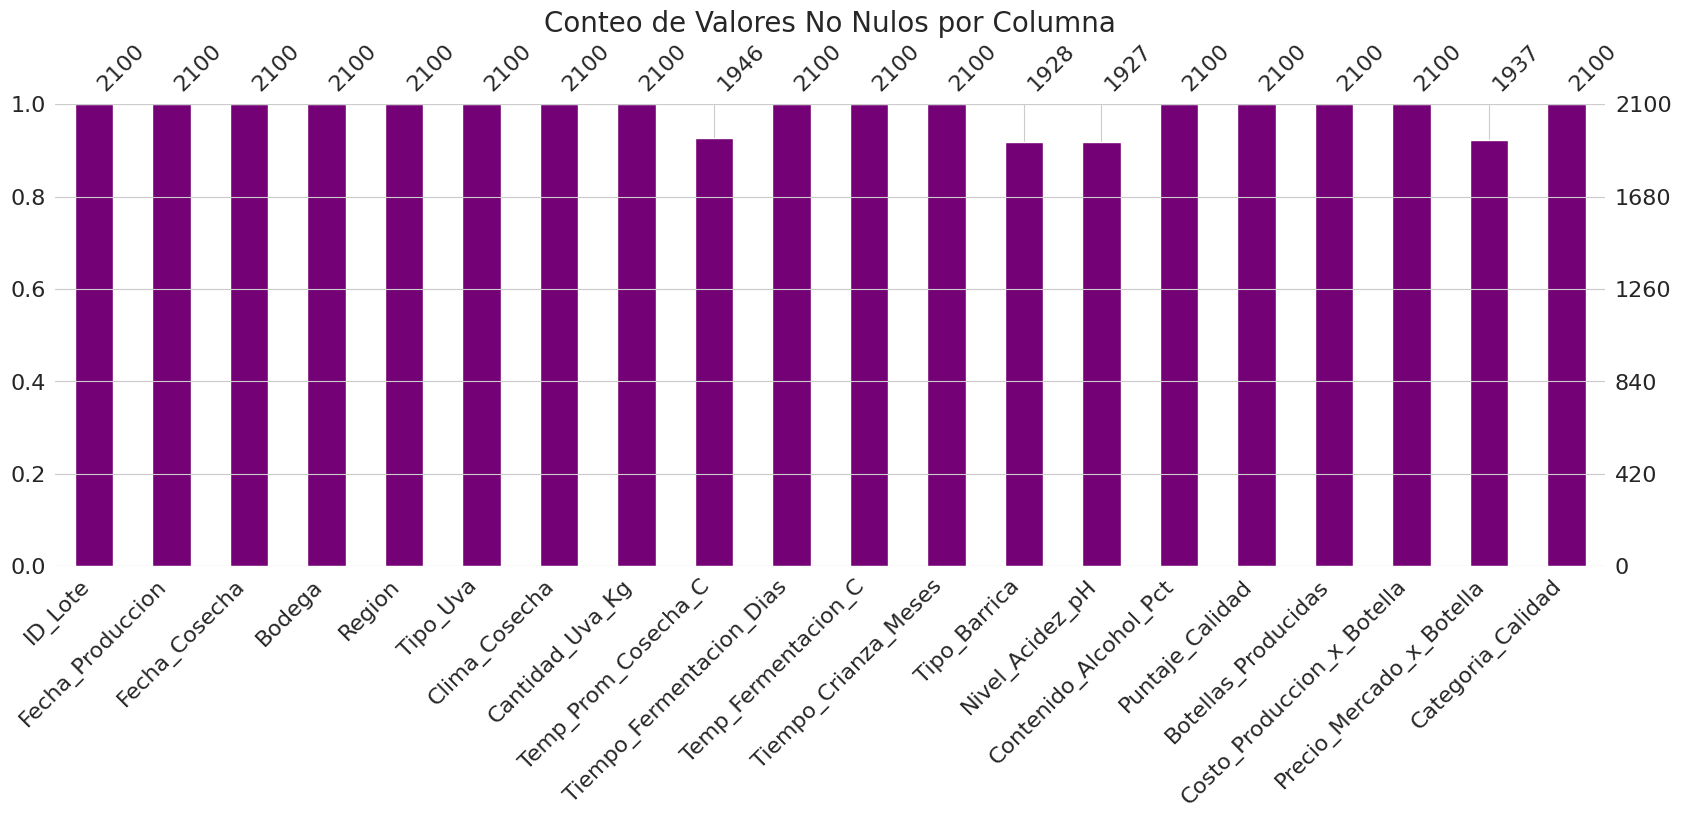

In [64]:
# Gráfico de barras de ausentismo: similar a .isnull().sum() pero gráfico
fig, ax = plt.subplots(figsize=(20, 6))
msno.bar(df, ax=ax, color='#740175')
plt.title('Conteo de Valores No Nulos por Columna', fontsize=20)
plt.show()

Resumen del Paso 1:
*   Hemos obtenido una visión general completa del dataset.
*   Conocemos sus dimensiones.
*   Hemos verificado los tipos de datos de cada columna.
*   Tenemos estadísticas descriptivas para las variables numéricas, que nos dan una idea de sus rangos y distribuciones centrales.
*   Hemos visto la distribución de las categorías para las variables cualitativas.
*   Hemos cuantificado exactamente cuántos valores nulos hay en cada columna y su porcentaje.

# Paso 4: Limpieza de Datos (Manejo de Nulos)

Basándonos en la inspección anterior, las columnas con valores nulos son:

*   Temp_Prom_Cosecha_C (numérica, float64)
*   Tipo_Barrica (categórica, object)

*   Nivel_Acidez_pH (numérica, float64)
*   Precio_Mercado_x_Botella (numérica, float64)

Todas tienen alrededor de un 8% de valores nulos. Este porcentaje es lo suficientemente pequeño como para que la imputación sea una estrategia razonable sin distorsionar demasiado los datos, y lo suficientemente grande como para que eliminar las filas pueda resultar en una pérdida significativa de información (perderíamos alrededor del 8% de las filas por cada columna si hiciéramos eliminación por lista, o incluso más si los nulos no se solapan perfectamente).



Estrategias de Imputación Propuestas:

1.   Temp_Prom_Cosecha_C **(Numérica)**:
*   **Estrategia**: Imputar con la media o la mediana. La mediana es generalmente más robusta a outliers. Dado que es una temperatura, la media podría ser razonable si la distribución no es muy sesgada. Vamos a revisar su distribución antes de decidir, pero por ahora consideremos la mediana.
*   **Justificación**: La temperatura promedio de cosecha es un valor continuo.

2.   Tipo_Barrica **(Categórica)**:
*   **Estrategia**: Imputar con la moda (el tipo de barrica más frecuente) o crear una nueva categoría como 'Desconocido' o 'No Registrado'.
*   **Justificación**: Si un tipo de barrica es dominante, la moda puede ser una buena aproximación. Si no, 'Desconocido' evita introducir un sesgo hacia un tipo particular y reconoce explícitamente la falta de información. Dado que en la generación de datos el Tipo_Barrica está ligado al Tiempo_Crianza_Meses (si es 'Acero Inoxidable' o 'Sin Crianza', el tiempo es 0), imputar con la moda podría ser problemático si la moda es un tipo de madera para una fila que tiene Tiempo_Crianza_Meses = 0.
*   **Consideración adicional**: Podríamos verificar si todos los nulos en Tipo_Barrica corresponden a Tiempo_Crianza_Meses == 0. Si es así, imputar con 'Acero Inoxidable' o 'Sin Crianza' (o la moda entre estos dos) sería lo más lógico. Si no, 'Desconocido' es más seguro.

3.   Nivel_Acidez_pH **(Numérica)**:
*   **Estrategia**: Imputar con la media o la mediana. Nuevamente, la mediana es una opción segura.
*   **Justificación**: El pH es un valor continuo.

4.   Precio_Mercado_x_Botella **(Numérica)**:
*   **Estrategia**: Imputar con la media o la mediana. La mediana es preferible, ya que los precios pueden tener una distribución sesgada.
*   **Justificación**: El precio es un valor continuo. Alternativamente, se podría considerar un modelo de regresión simple para predecir el precio basado en Costo_Produccion_x_Botella y Puntaje_Calidad para imputar, pero por simplicidad, la mediana es un buen punto de partida.











In [19]:
# Hago una copia para trabajar
df_cleaned = df.copy()

# 1. Imputación para Temp_Prom_Cosecha_C
median_temp_cosecha = df_cleaned['Temp_Prom_Cosecha_C'].median()
df_cleaned['Temp_Prom_Cosecha_C'] = df_cleaned['Temp_Prom_Cosecha_C'].fillna(median_temp_cosecha)
print(f"Valores nulos en 'Temp_Prom_Cosecha_C' después de imputar con la mediana ({median_temp_cosecha:.1f}): {df_cleaned['Temp_Prom_Cosecha_C'].isnull().sum()}")

# 2. Imputación para Tipo_Barrica
# Análisis previo (opcional aquí ya que optaremos por 'Desconocido', pero bueno para entender)
# print("\nAnálisis para imputación de 'Tipo_Barrica':")
# print("Moda de 'Tipo_Barrica':", df_cleaned['Tipo_Barrica'].mode()[0])
# null_barrica_rows = df_cleaned[df_cleaned['Tipo_Barrica'].isnull()]
# print(f"Número de filas con Tipo_Barrica nulo: {len(null_barrica_rows)}")
# print("Distribución de 'Tiempo_Crianza_Meses' donde 'Tipo_Barrica' es nulo:")
# print(null_barrica_rows['Tiempo_Crianza_Meses'].value_counts().sort_index())

# Imputación con 'Desconocido'
df_cleaned['Tipo_Barrica'] = df_cleaned['Tipo_Barrica'].fillna('Desconocido')
print(f"\nValores nulos en 'Tipo_Barrica' después de imputar con 'Desconocido': {df_cleaned['Tipo_Barrica'].isnull().sum()}")
# print("Nuevos valores únicos en 'Tipo_Barrica':", df_cleaned['Tipo_Barrica'].unique())

# 3. Imputación para Nivel_Acidez_pH
median_ph = df_cleaned['Nivel_Acidez_pH'].median()
df_cleaned['Nivel_Acidez_pH'] = df_cleaned['Nivel_Acidez_pH'].fillna(median_ph)
print(f"\nValores nulos en 'Nivel_Acidez_pH' después de imputar con la mediana ({median_ph:.2f}): {df_cleaned['Nivel_Acidez_pH'].isnull().sum()}")

# 4. Imputación para Precio_Mercado_x_Botella
median_precio = df_cleaned['Precio_Mercado_x_Botella'].median()
df_cleaned['Precio_Mercado_x_Botella'] = df_cleaned['Precio_Mercado_x_Botella'].fillna(median_precio)
print(f"\nValores nulos en 'Precio_Mercado_x_Botella' después de imputar con la mediana ({median_precio:.2f}): {df_cleaned['Precio_Mercado_x_Botella'].isnull().sum()}")

# Verificación Final de Nulos
print("\n--- Verificación Final de Nulos en df_cleaned ---")
null_counts_cleaned = df_cleaned.isnull().sum()
# print(null_counts_cleaned[null_counts_cleaned > 0]) # Mostrar solo columnas que aún tengan nulos
if null_counts_cleaned.sum() == 0:
    print("\n¡Todos los valores nulos han sido tratados en df_cleaned!")
else:
    print("\nAdvertencia: Aún quedan valores nulos en las siguientes columnas:")
    print(null_counts_cleaned[null_counts_cleaned > 0])

print("\n--- Información de df_cleaned después de la imputación ---")
df_cleaned.info()

Valores nulos en 'Temp_Prom_Cosecha_C' después de imputar con la mediana (22.5): 0

Valores nulos en 'Tipo_Barrica' después de imputar con 'Desconocido': 0

Valores nulos en 'Nivel_Acidez_pH' después de imputar con la mediana (3.58): 0

Valores nulos en 'Precio_Mercado_x_Botella' después de imputar con la mediana (15.57): 0

--- Verificación Final de Nulos en df_cleaned ---

¡Todos los valores nulos han sido tratados en df_cleaned!

--- Información de df_cleaned después de la imputación ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID_Lote                     2100 non-null   int64         
 1   Fecha_Produccion            2100 non-null   datetime64[ns]
 2   Fecha_Cosecha               2100 non-null   datetime64[ns]
 3   Bodega                      2100 non-null   object        
 4   Region  

*(Las medianas exactas pueden variar ligeramente si ejecutas la generación de datos de nuevo).*

Resumen del Paso 2:
*   Hemos creado una copia del DataFrame (df_cleaned).
*   Hemos imputado los valores nulos en Temp_Prom_Cosecha_C y Nivel_Acidez_pH con sus respectivas medianas.
*   Hemos imputado los valores nulos en Tipo_Barrica con la categoría 'Desconocido'.
*   Hemos imputado los valores nulos en Precio_Mercado_x_Botella con su mediana.
*   El DataFrame df_cleaned ahora no contiene valores nulos y está listo para el Análisis Exploratorio de Datos (EDA).












# Paso 5: Análisis Exploratorio de Datos (EDA) y Visualización.

## 5.a. Distribuciones de Variables Clave

### 5.a.1. Columnas Numéricas Clave:

Histogramas para Puntaje_Calidad, Contenido_Alcohol_Pct, Costo_Produccion_x_Botella, Precio_Mercado_x_Botella, Tiempo_Crianza_Meses.

--- 3.a.1 Distribuciones de Columnas Numéricas Clave ---


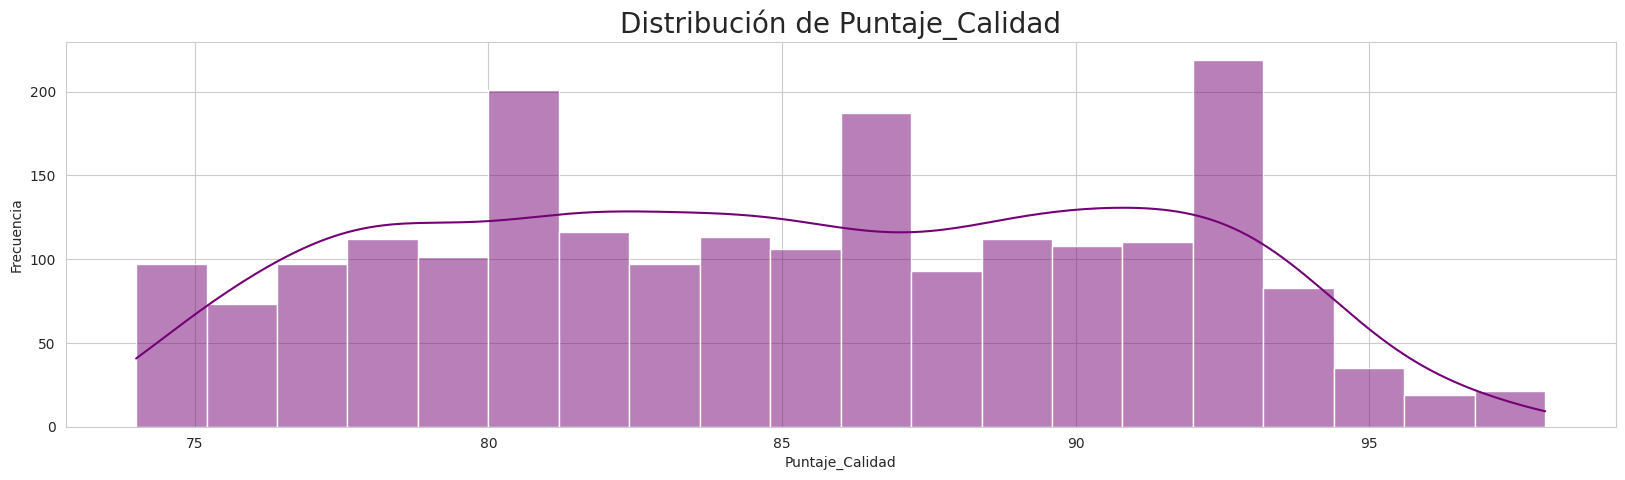

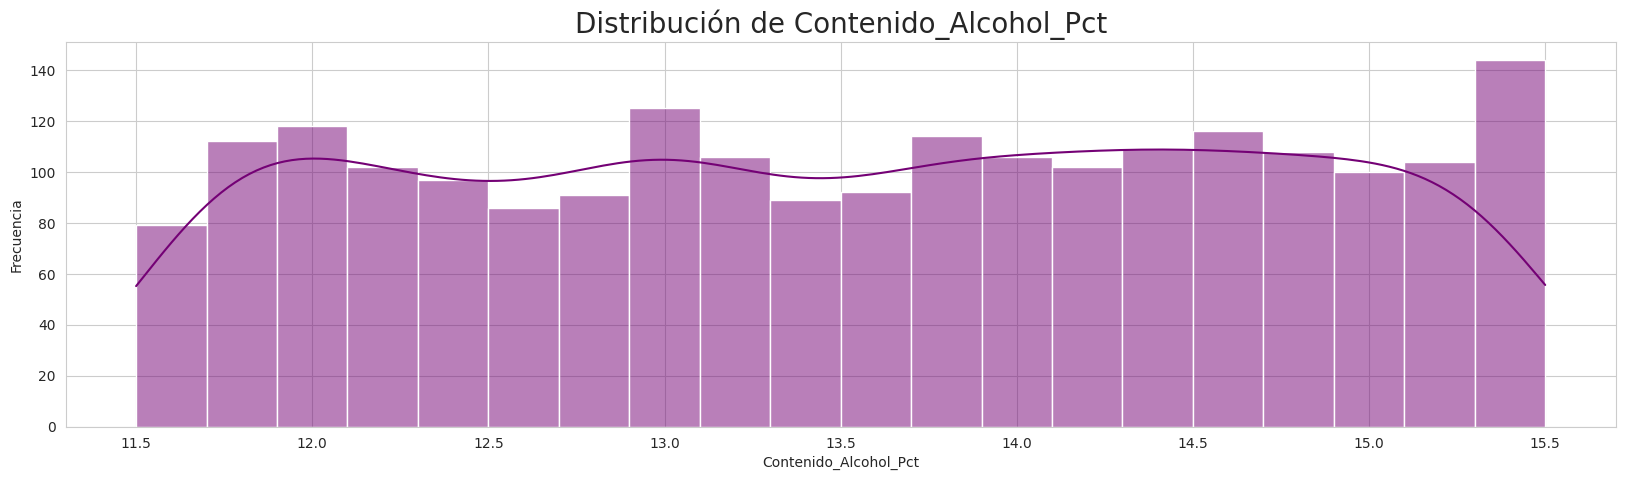

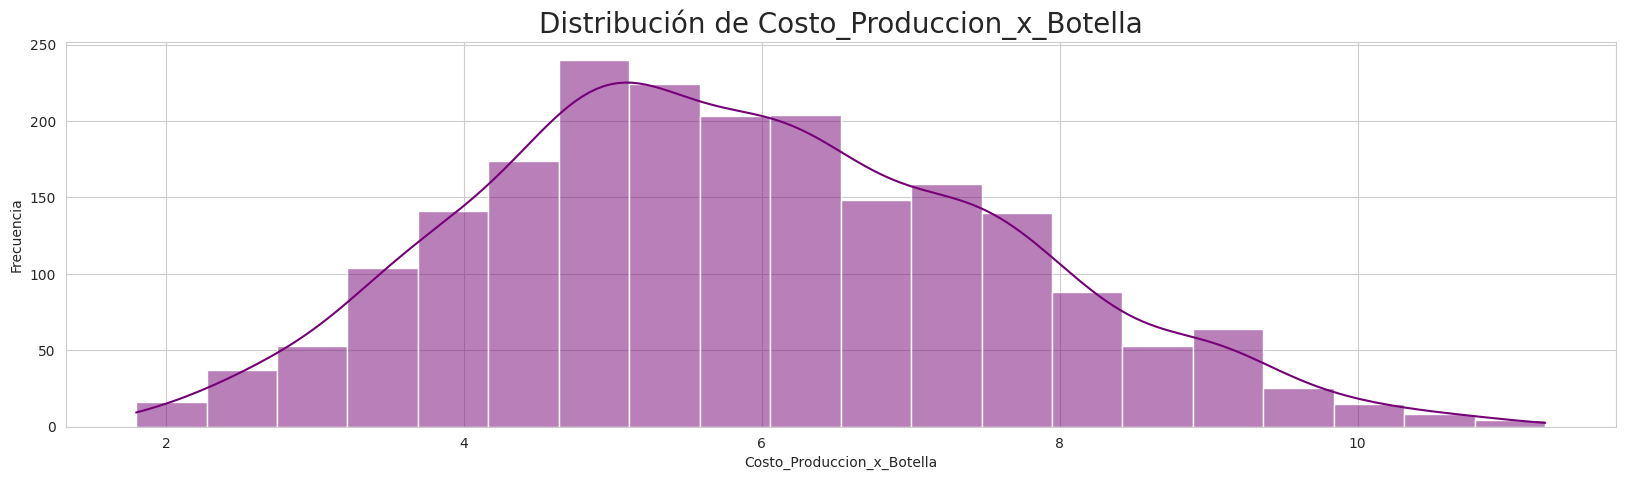

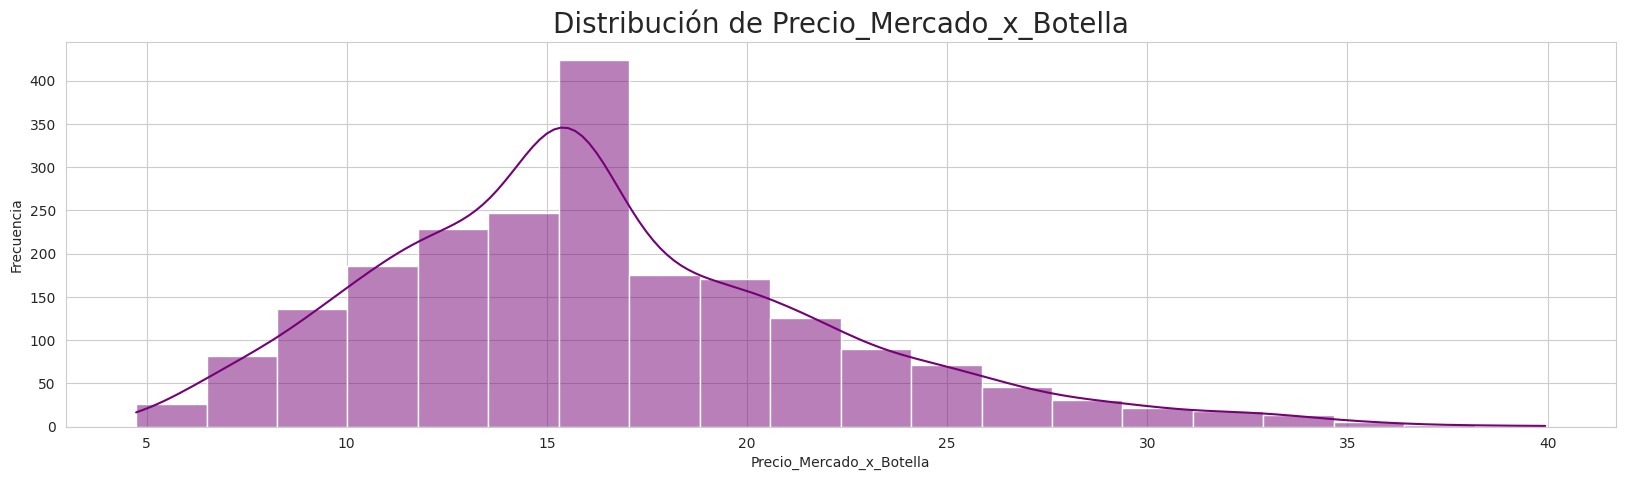

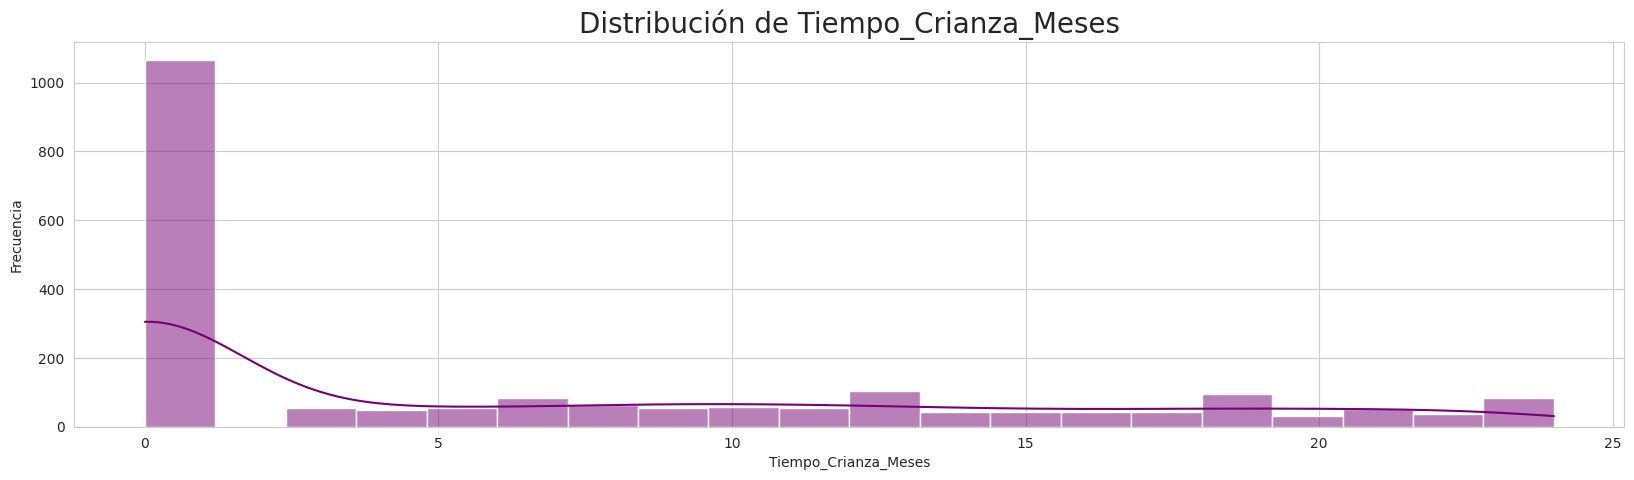

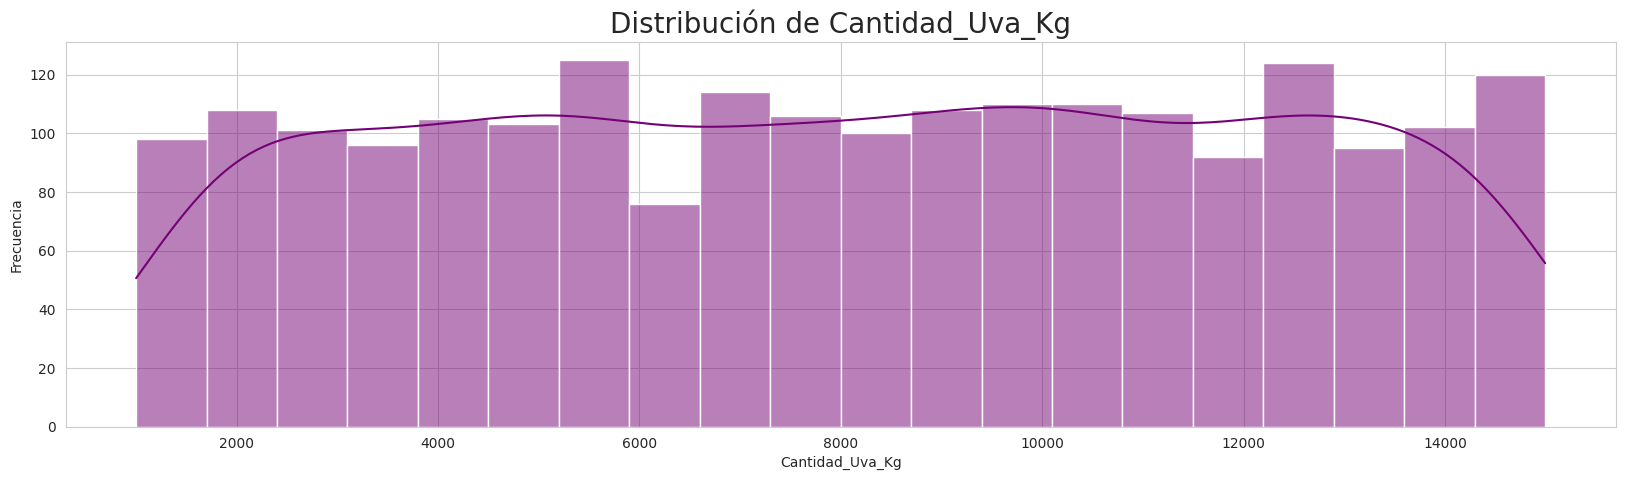

In [63]:
print("--- 3.a.1 Distribuciones de Columnas Numéricas Clave ---")

cols_numericas_clave = [
    'Puntaje_Calidad', 'Contenido_Alcohol_Pct',
    'Costo_Produccion_x_Botella', 'Precio_Mercado_x_Botella',
    'Tiempo_Crianza_Meses', 'Cantidad_Uva_Kg'
]

for col in cols_numericas_clave:
    plt.figure(figsize=(20, 5))
    sns.histplot(df_cleaned[col], kde=True, bins=20, color='#740175') # kde=True añade una estimación de densidad del kernel
    plt.title(f'Distribución de {col}', fontsize=20)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

Observaciones esperadas de los histogramas:
*   Puntaje_Calidad: Debería mostrar una distribución algo normal o ligeramente sesgada, dentro del rango 70-100. Podríamos ver picos si la lógica de quality_adjustment favorece ciertos puntajes.
*   Contenido_Alcohol_Pct: Probablemente una distribución bastante uniforme o normal dentro del rango especificado (11.5-15.5).
*   Costo_Produccion_x_Botella: Podría estar sesgada a la derecha, ya que los ajustes de costo pueden aumentar algunos valores más que otros.
*   Precio_Mercado_x_Botella: Similar al costo, podría estar sesgada a la derecha, influenciada por la calidad y el costo.
*   Tiempo_Crianza_Meses: Tendrá un pico en 0 (para 'Acero Inoxidable'/'Sin Crianza') y luego una distribución para los meses de crianza en madera.
*   Cantidad_Uva_Kg: Debería ser relativamente uniforme dentro del rango de generación.













### 5.a.2. Columnas Categóricas Clave:

Gráficos de barras para Bodega, Region, Tipo_Uva, Clima_Cosecha, Tipo_Barrica, Categoria_Calidad.


--- 3.a.2 Distribuciones de Columnas Categóricas Clave ---


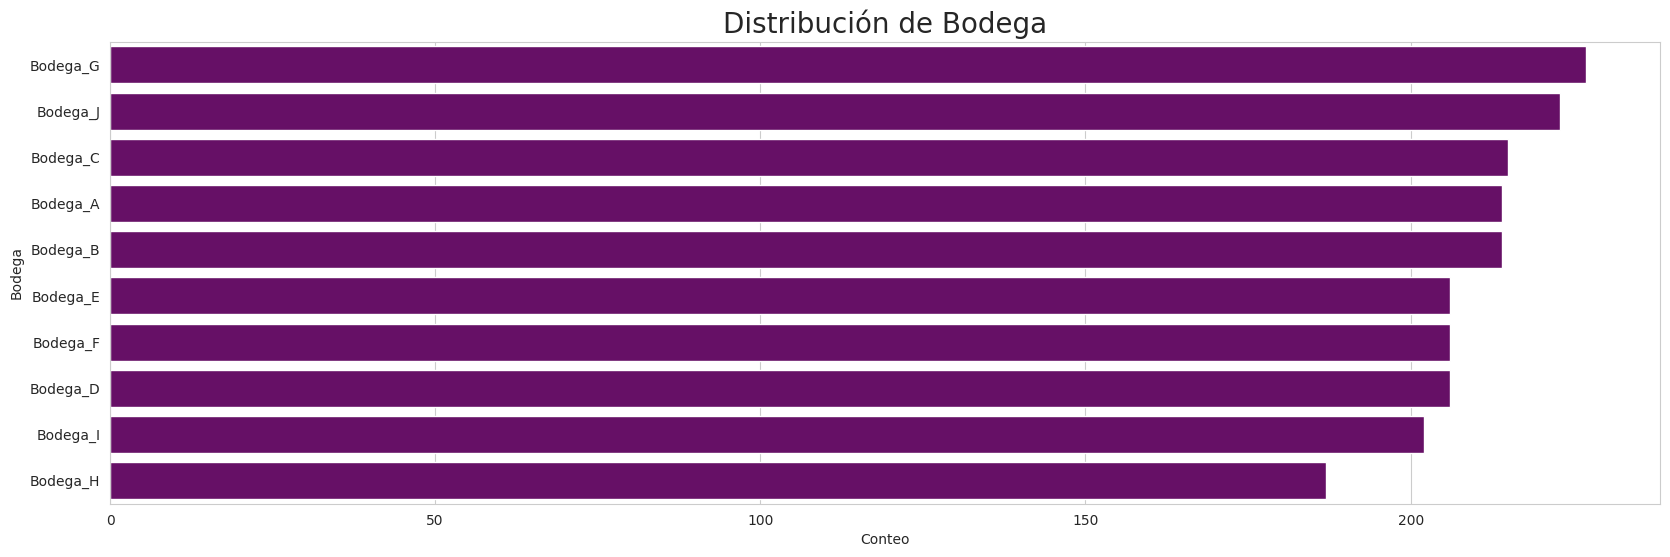

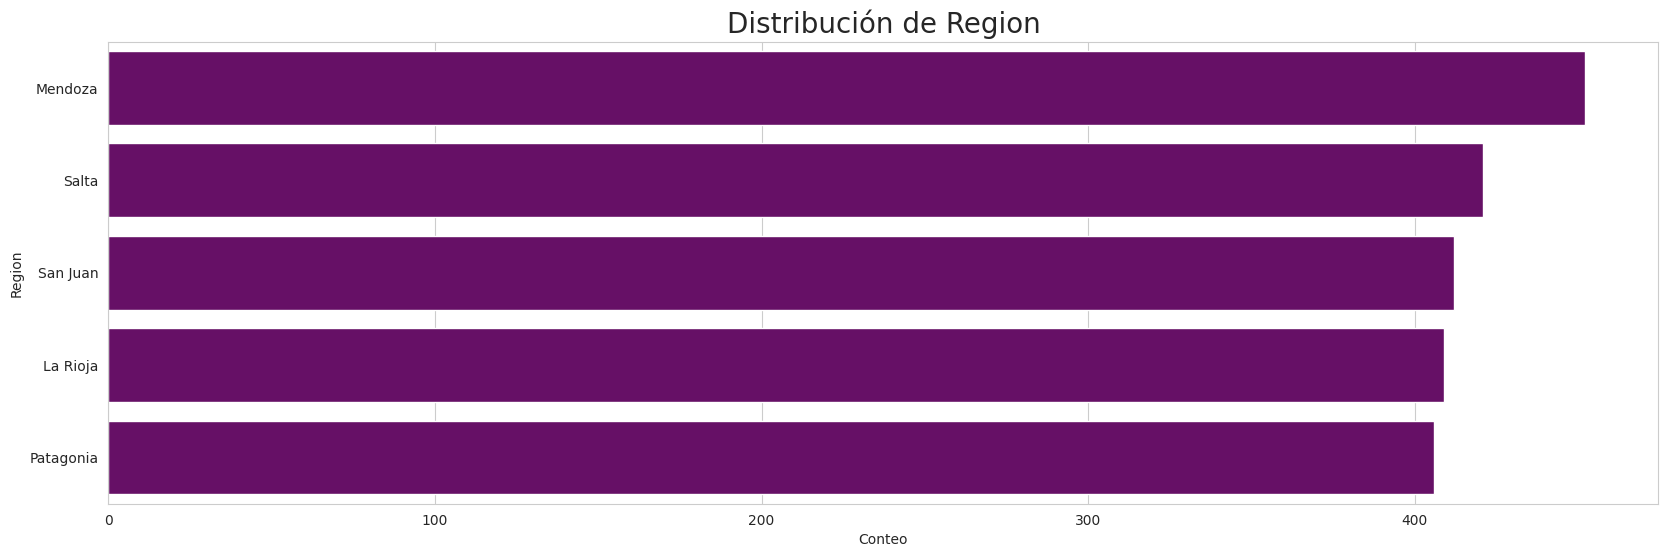

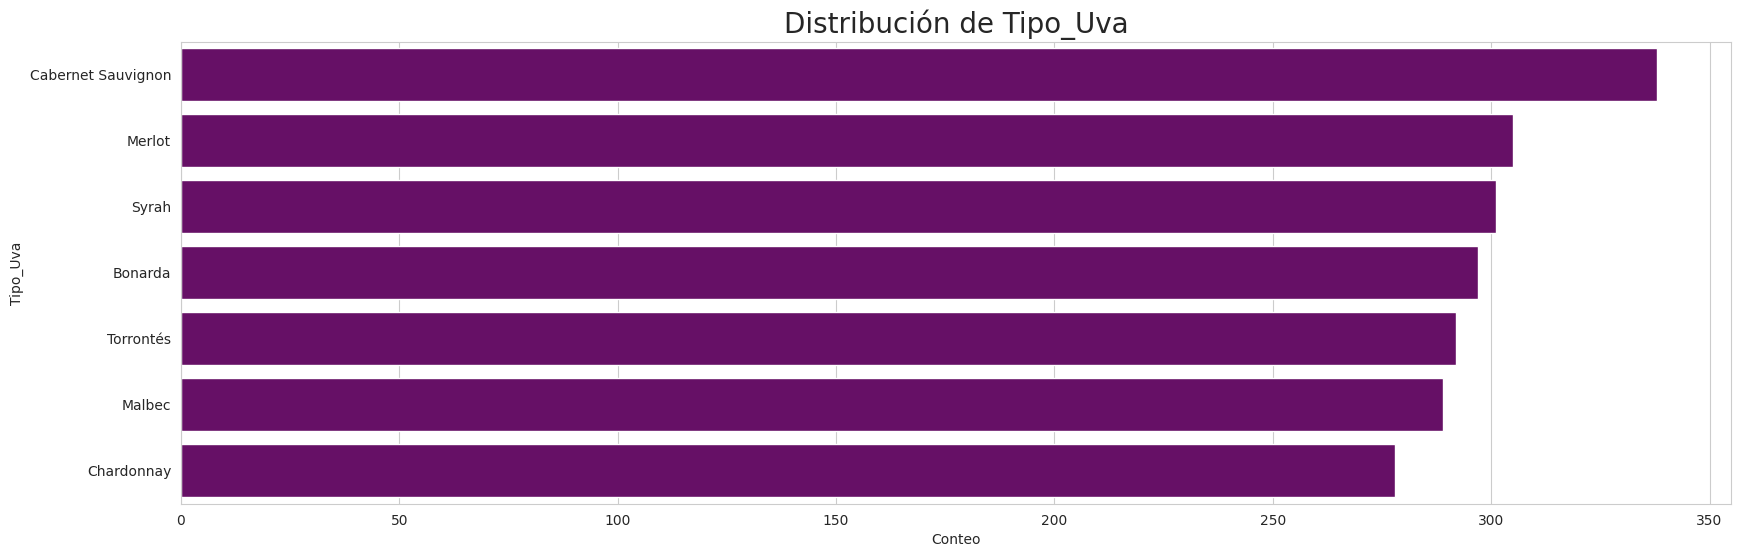

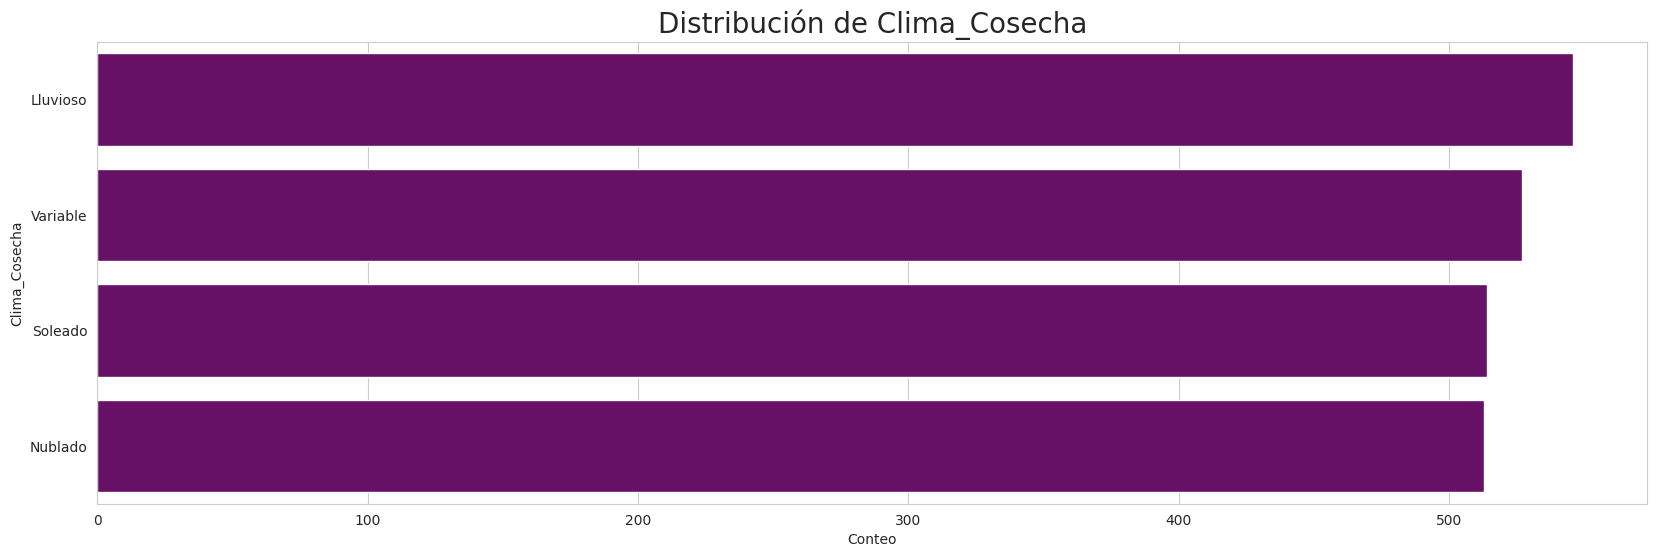

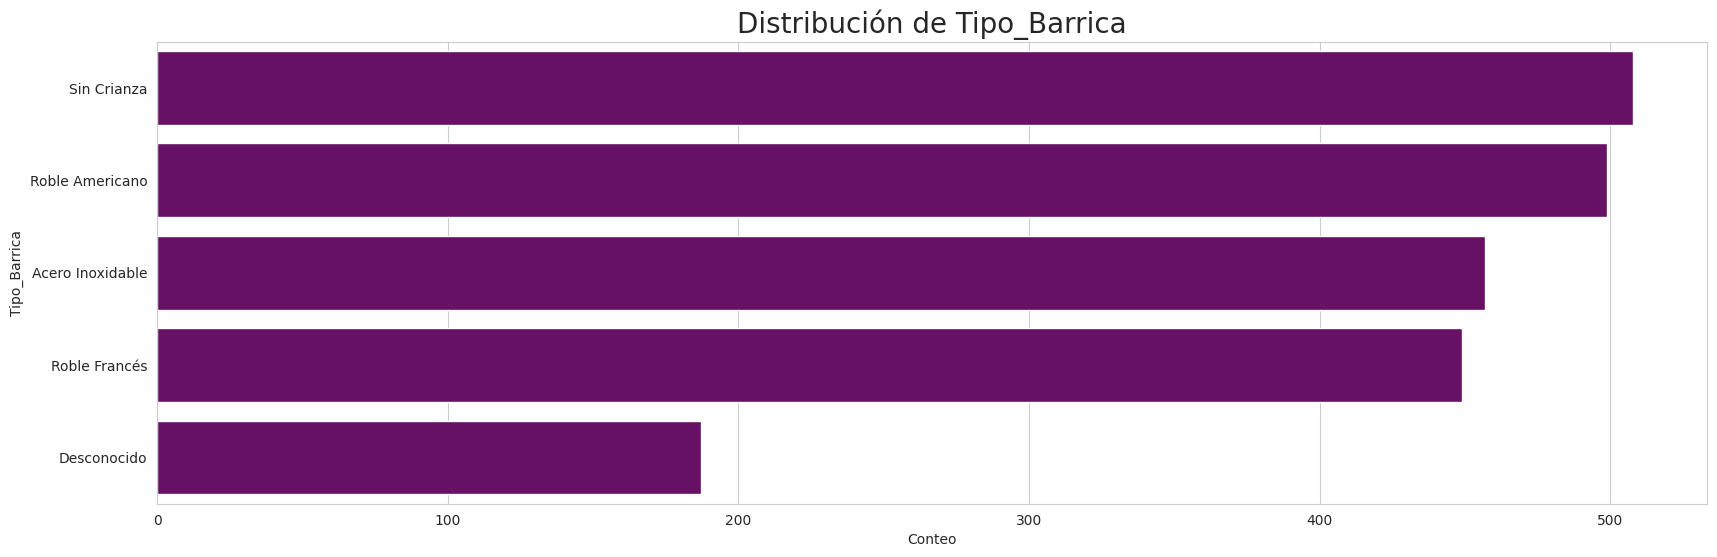

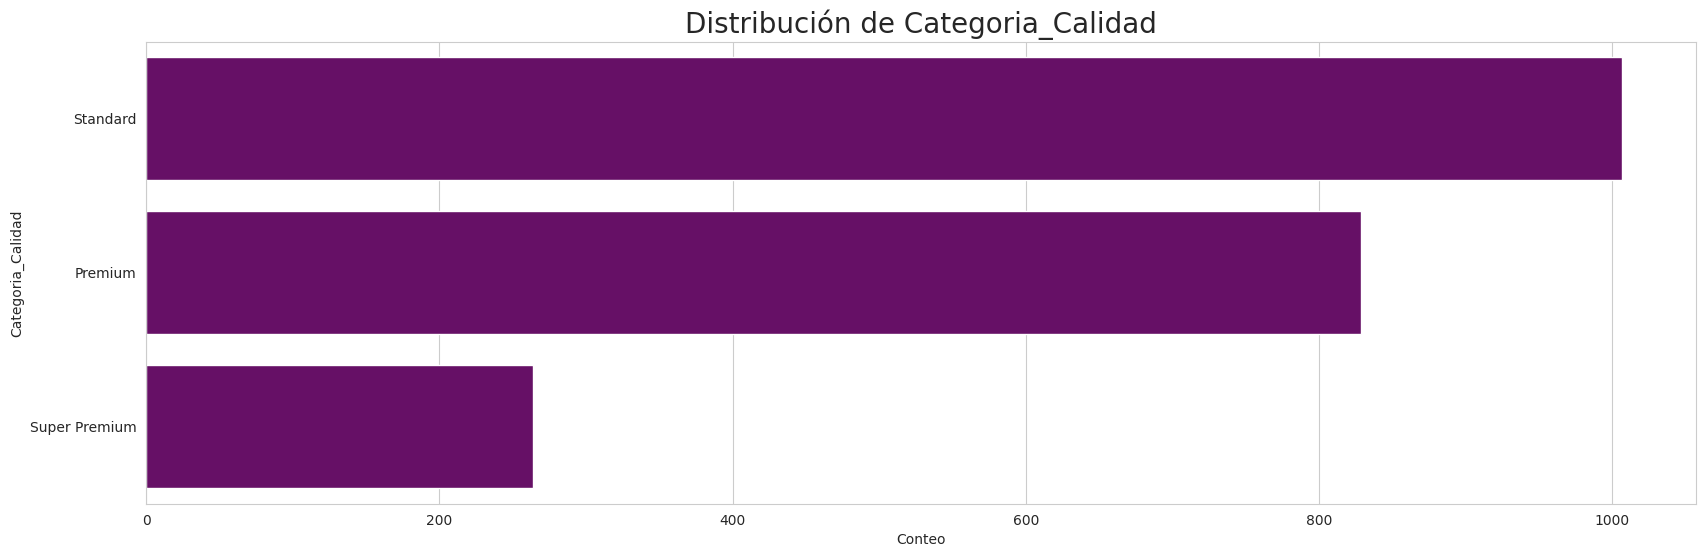

In [62]:
print("\n--- 3.a.2 Distribuciones de Columnas Categóricas Clave ---")

cols_categoricas_clave = [
    'Bodega', 'Region', 'Tipo_Uva', 'Clima_Cosecha',
    'Tipo_Barrica', # Recordar que ahora tiene la categoría 'Desconocido'
    'Categoria_Calidad'
]

for col in cols_categoricas_clave:
    plt.figure(figsize=(20, 6))
    sns.countplot(y=df_cleaned[col], order=df_cleaned[col].value_counts().index, color='#740175') # 'y' para barras horizontales si hay muchas categorías
    plt.title(f'Distribución de {col}', fontsize=20)
    plt.xlabel('Conteo')
    plt.ylabel(col)
    plt.show()

Observaciones esperadas de los gráficos de barras:
*   Bodega, Region, Tipo_Uva, Clima_Cosecha: Mostrarán la frecuencia de cada categoría. Como se generaron con random.choices, la distribución debería ser relativamente uniforme, aunque la aleatoriedad puede causar variaciones.
*   Tipo_Barrica: Veremos las 4 originales más la categoría 'Desconocido'. Será interesante ver la proporción de 'Desconocido' (alrededor del 8%).
*   Categoria_Calidad: Ya vimos los conteos, pero el gráfico de barras lo visualizará mejor (Standard > Premium > Super Premium).








## 5.b. Relaciones entre Variables

### 5.b.1. Calidad:

*   Puntaje_Calidad vs. Tiempo_Crianza_Meses (scatter plot)
*   Puntaje_Calidad vs. Temp_Fermentacion_C (scatter plot)
*   Distribución del Puntaje_Calidad por Tipo_Uva, Region, Tipo_Barrica (box plots)
*   Relación entre Categoria_Calidad y Tipo_Barrica (tabla de contingencia, gráfico de barras agrupado)






--- 3.b.1 Relaciones con la Calidad ---


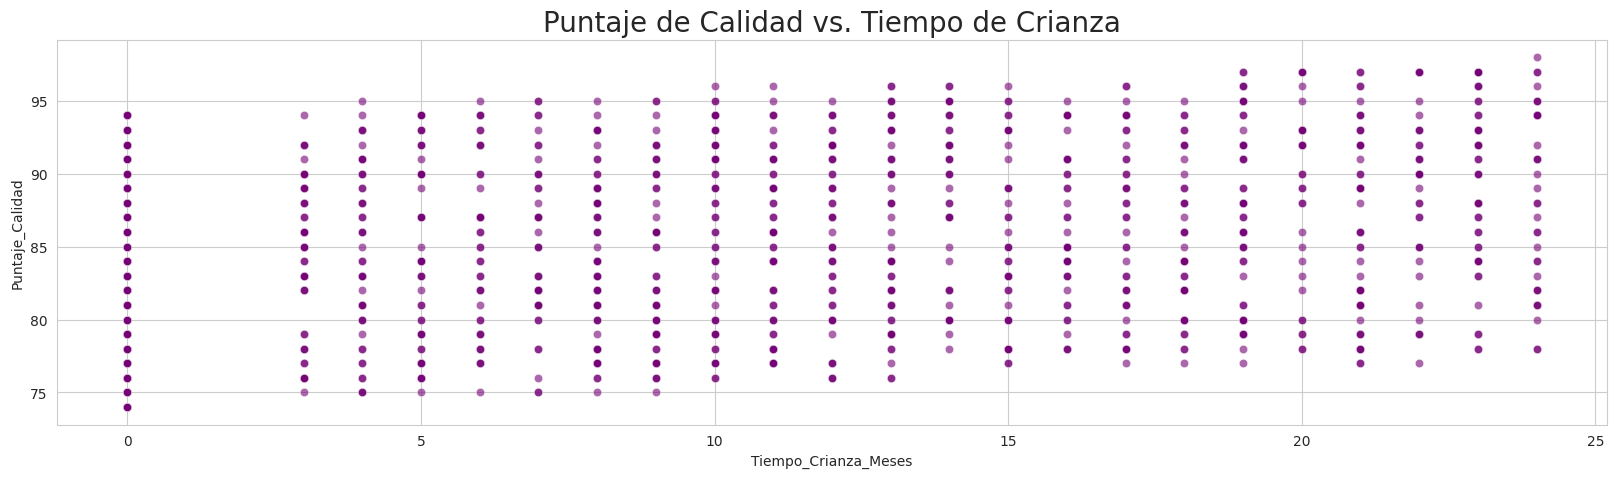

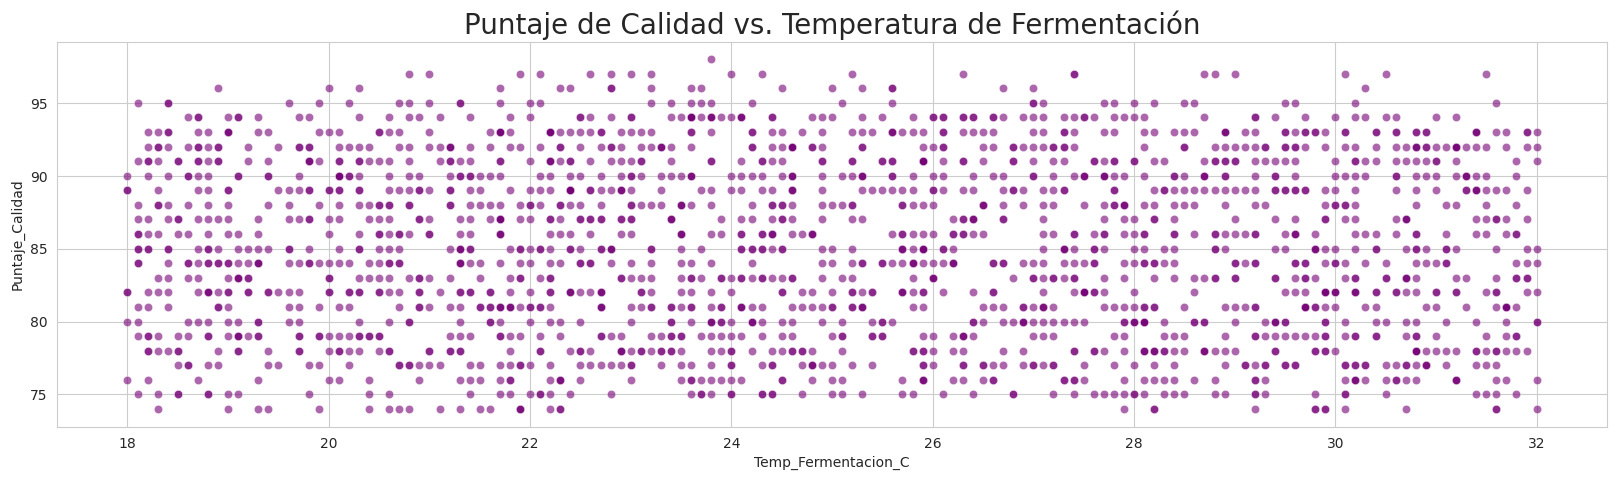

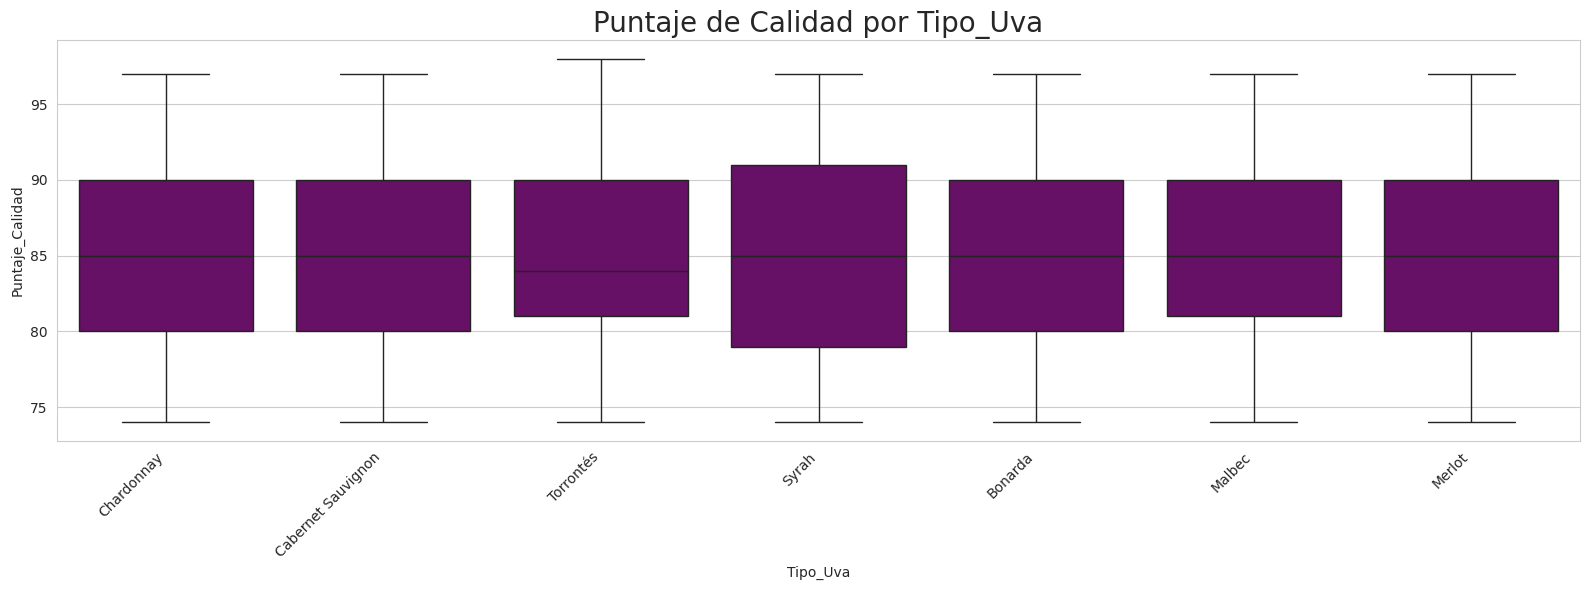

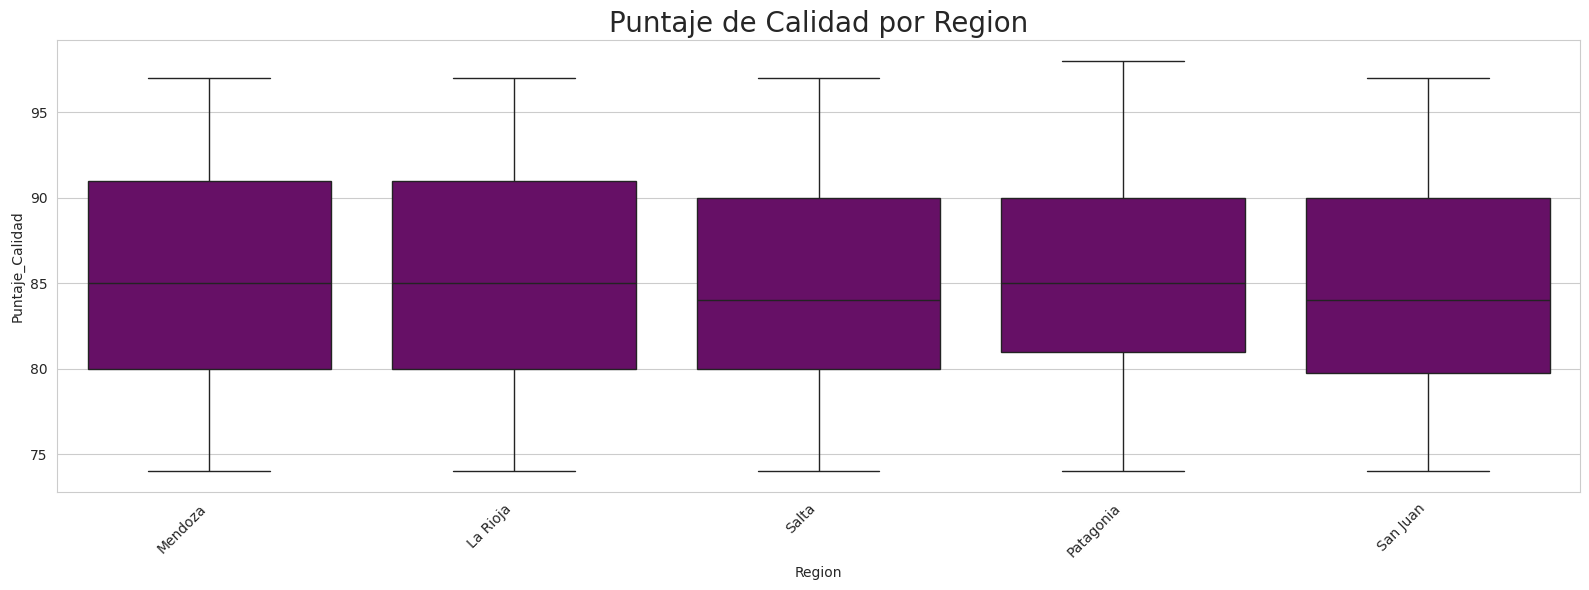

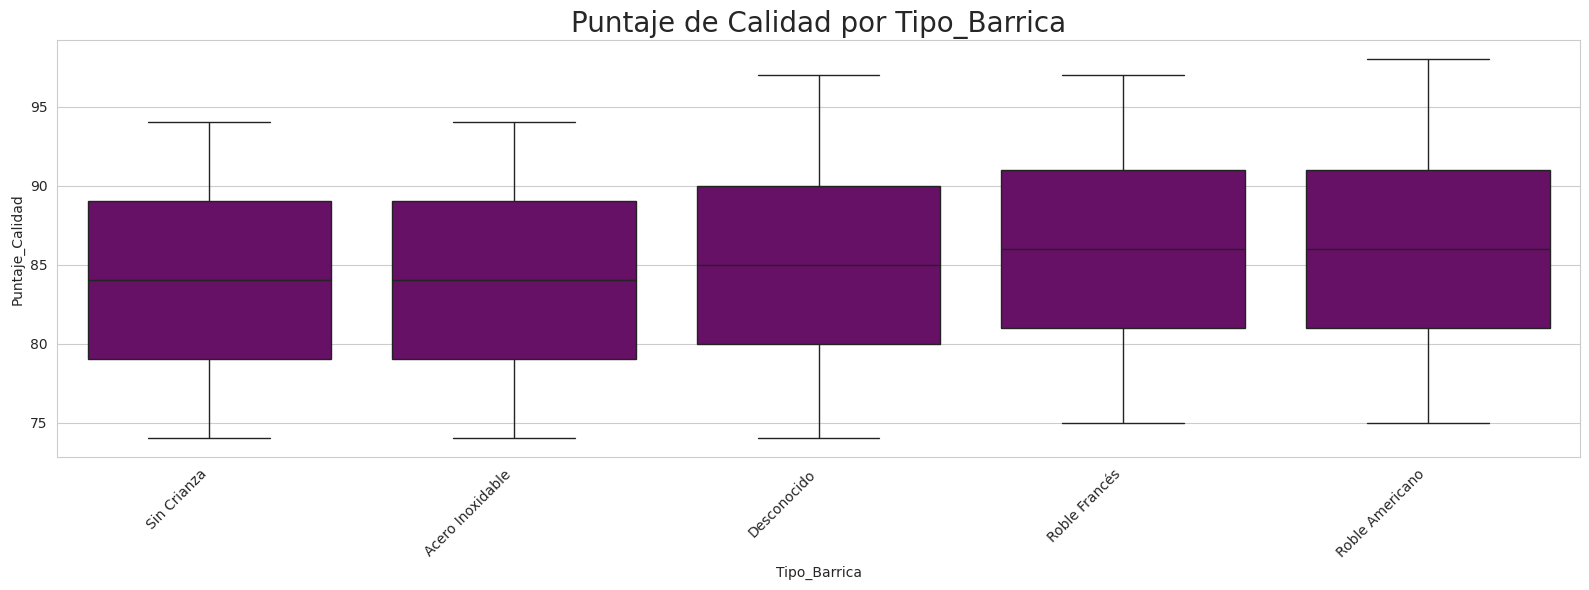

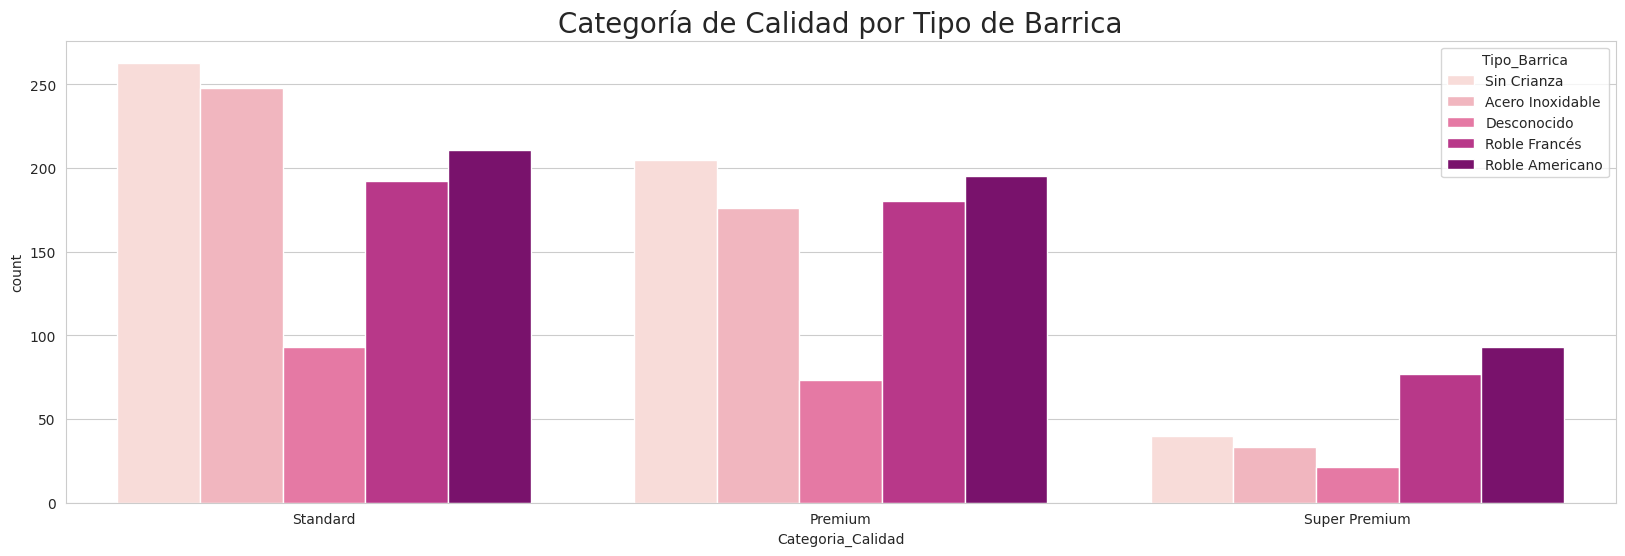


Tabla de Contingencia: Categoria_Calidad vs. Tipo_Barrica (Porcentajes por fila)
| Categoria_Calidad   |   Acero Inoxidable |   Desconocido |   Roble Americano |   Roble Francés |   Sin Crianza |
|:--------------------|-------------------:|--------------:|------------------:|----------------:|--------------:|
| Standard            |               24.6 |           9.2 |              21   |            19.1 |          26.1 |
| Premium             |               21.2 |           8.8 |              23.5 |            21.7 |          24.7 |
| Super Premium       |               12.5 |           8   |              35.2 |            29.2 |          15.2 |


In [61]:
print("\n--- 3.b.1 Relaciones con la Calidad ---")

# Puntaje_Calidad vs. Tiempo_Crianza_Meses
plt.figure(figsize=(20, 5))
sns.scatterplot(x='Tiempo_Crianza_Meses', y='Puntaje_Calidad', data=df_cleaned, alpha=0.6, color='#740175')
plt.title('Puntaje de Calidad vs. Tiempo de Crianza', fontsize=20)
plt.show()

# Puntaje_Calidad vs. Temp_Fermentacion_C
plt.figure(figsize=(20, 5))
sns.scatterplot(x='Temp_Fermentacion_C', y='Puntaje_Calidad', data=df_cleaned, alpha=0.6, color='#740175')
plt.title('Puntaje de Calidad vs. Temperatura de Fermentación', fontsize=20)
plt.show()

# Box plots de Puntaje_Calidad por categorías
for cat_col in ['Tipo_Uva', 'Region', 'Tipo_Barrica']:
    plt.figure(figsize=(16, 6))
    sns.boxplot(x=cat_col, y='Puntaje_Calidad', data=df_cleaned, color='#740175')
    plt.title(f'Puntaje de Calidad por {cat_col}', fontsize=20)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Categoria_Calidad vs. Tipo_Barrica
plt.figure(figsize=(20, 6))
sns.countplot(x='Categoria_Calidad', hue='Tipo_Barrica', data=df_cleaned, palette="RdPu")
plt.title('Categoría de Calidad por Tipo de Barrica', fontsize=20)
plt.show()

# Tabla de contingencia para Categoria_Calidad y Tipo_Barrica
contingency_calidad_barrica = pd.crosstab(df_cleaned['Categoria_Calidad'], df_cleaned['Tipo_Barrica'], normalize='index')*100
print("\nTabla de Contingencia: Categoria_Calidad vs. Tipo_Barrica (Porcentajes por fila)")
print(contingency_calidad_barrica.round(1).to_markdown())

Observaciones esperadas:
*   Scatter plots (Puntaje_Calidad vs. Tiempo_Crianza_Meses y Puntaje_Calidad vs. Temp_Fermentacion_C): Deberían reflejar la lógica de quality_adjustment (ligera tendencia positiva para crianza, una forma de 'U' invertida para temperatura de fermentación alrededor de 25°C).
*   Box plots (Distribución del Puntaje_Calidad por Tipo_Uva, Region, Tipo_Barrica): Podrían revelar si ciertos tipos de uva, regiones o tipos de barrica tienden a producir vinos con puntajes consistentemente más altos o bajos.
*   Crosstab (Relación entre Categoria_Calidad y Tipo_Barrica): Mostrará si, por ejemplo, los vinos 'Super Premium' usan más barricas de roble que los 'Standard', o si la categoría 'Desconocido' se distribuye de forma similar.








### 5.b.2. Costos y Precios:

*   Costo_Produccion_x_Botella vs. Tiempo_Crianza_Meses, Cantidad_Uva_Kg (scatter plots)
*   Precio_Mercado_x_Botella vs. Puntaje_Calidad, Costo_Produccion_x_Botella (scatter plots)
*   Comparar Precio_Mercado_x_Botella entre Categoria_Calidad (box plots)


--- 3.b.2 Relaciones de Costos y Precios ---


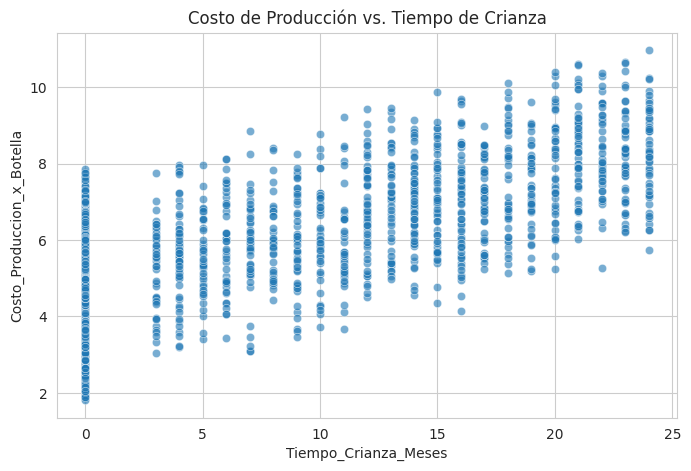

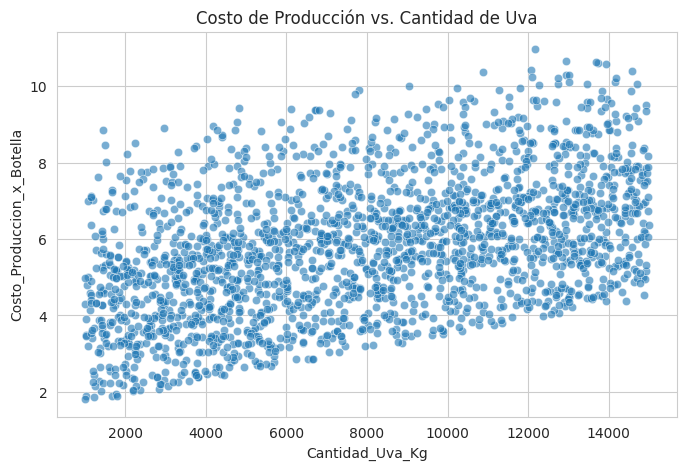

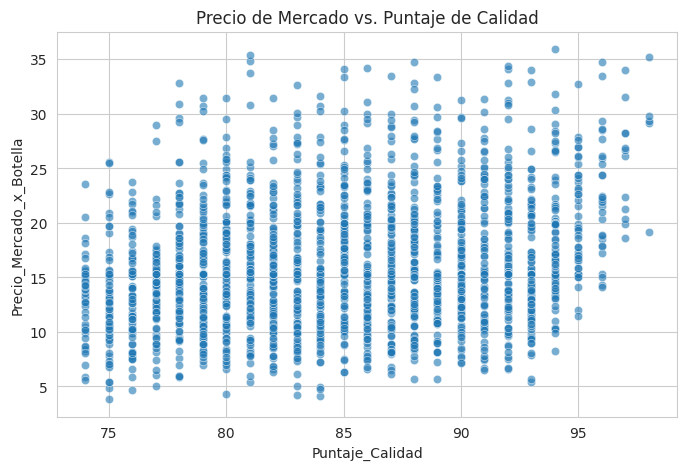

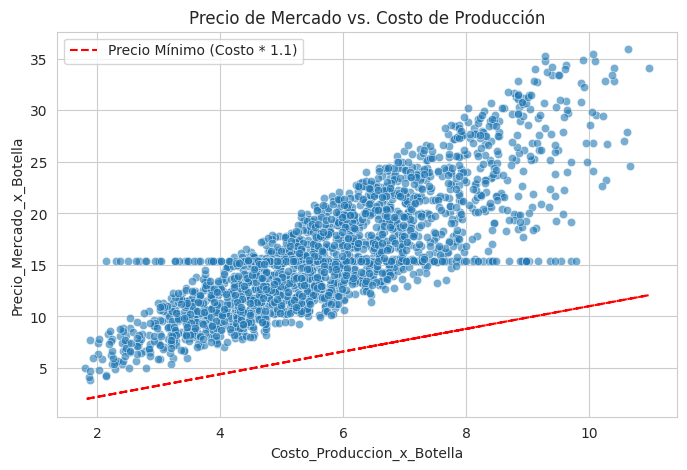

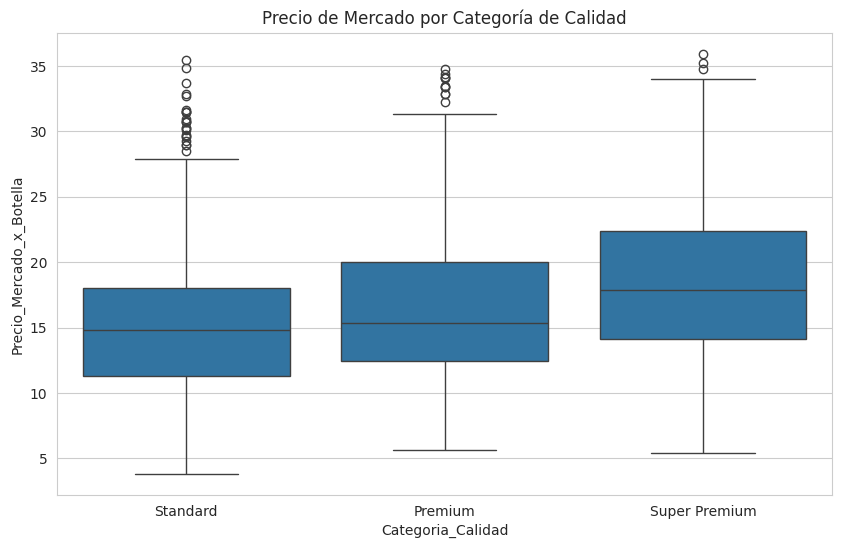

In [28]:
print("\n--- 3.b.2 Relaciones de Costos y Precios ---")

# Costo vs. Tiempo_Crianza_Meses
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Tiempo_Crianza_Meses', y='Costo_Produccion_x_Botella', data=df_cleaned, alpha=0.6)
plt.title('Costo de Producción vs. Tiempo de Crianza')
plt.show()

# Costo vs. Cantidad_Uva_Kg
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Cantidad_Uva_Kg', y='Costo_Produccion_x_Botella', data=df_cleaned, alpha=0.6)
plt.title('Costo de Producción vs. Cantidad de Uva')
plt.show()

# Precio vs. Puntaje_Calidad
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Puntaje_Calidad', y='Precio_Mercado_x_Botella', data=df_cleaned, alpha=0.6)
plt.title('Precio de Mercado vs. Puntaje de Calidad')
plt.show()

# Precio vs. Costo
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Costo_Produccion_x_Botella', y='Precio_Mercado_x_Botella', data=df_cleaned, alpha=0.6)
# Añadir línea de referencia donde precio = costo * 1.1 (precio mínimo)
min_price_line = df_cleaned['Costo_Produccion_x_Botella'] * 1.1
plt.plot(df_cleaned['Costo_Produccion_x_Botella'], min_price_line, color='red', linestyle='--', label='Precio Mínimo (Costo * 1.1)')
plt.title('Precio de Mercado vs. Costo de Producción')
plt.legend()
plt.show()


# Box plots de Precio_Mercado_x_Botella por Categoria_Calidad
plt.figure(figsize=(10, 6))
sns.boxplot(x='Categoria_Calidad', y='Precio_Mercado_x_Botella', data=df_cleaned)
plt.title('Precio de Mercado por Categoría de Calidad')
plt.show()

Observaciones esperadas:

*   Se deberían ver las correlaciones positivas definidas en la generación de datos (más crianza/volumen = más costo; más calidad/crianza/costo = más precio).
*   El gráfico de Precio vs Costo debería mostrar que todos los puntos están por encima de la línea roja de Precio Mínimo.
*   Los box plots deberían mostrar que el precio aumenta con la categoría de calidad.








### 5.b.3. Producción:

*   Botellas_Producidas vs. Cantidad_Uva_Kg (verificar el yield_factor)





--- 3.b.3 Relaciones de Producción ---


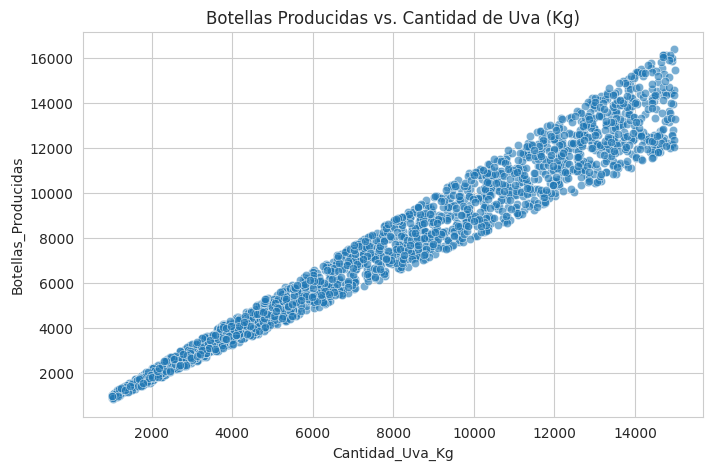

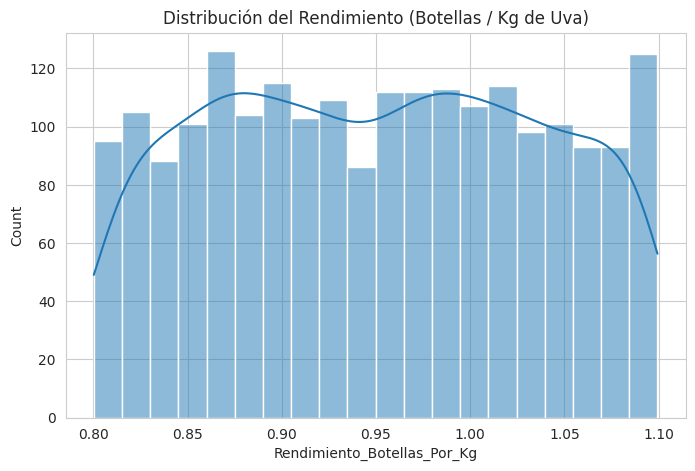

|       |   Rendimiento_Botellas_Por_Kg |
|:------|------------------------------:|
| count |                  2100         |
| mean  |                     0.950729  |
| std   |                     0.0857843 |
| min   |                     0.800258  |
| 25%   |                     0.876467  |
| 50%   |                     0.952262  |
| 75%   |                     1.02196   |
| max   |                     1.09944   |


In [29]:
print("\n--- 3.b.3 Relaciones de Producción ---")

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Cantidad_Uva_Kg', y='Botellas_Producidas', data=df_cleaned, alpha=0.6)
plt.title('Botellas Producidas vs. Cantidad de Uva (Kg)')
# Podríamos intentar graficar las líneas de rendimiento (0.8 y 1.1 botellas/kg)
# x_vals = np.array(plt.xlim())
# plt.plot(x_vals, x_vals * 0.8, color='red', linestyle='--', label='Rendimiento 0.8 bot/kg')
# plt.plot(x_vals, x_vals * 1.1, color='green', linestyle='--', label='Rendimiento 1.1 bot/kg')
# plt.legend()
plt.show()

# Calcular el rendimiento real y ver su distribución
df_cleaned['Rendimiento_Botellas_Por_Kg'] = df_cleaned['Botellas_Producidas'] / df_cleaned['Cantidad_Uva_Kg']
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned['Rendimiento_Botellas_Por_Kg'], kde=True, bins=20)
plt.title('Distribución del Rendimiento (Botellas / Kg de Uva)')
plt.show()
print(df_cleaned['Rendimiento_Botellas_Por_Kg'].describe().to_markdown())

Observaciones esperadas:

*   Fuerte correlación lineal positiva. La distribución del rendimiento calculado debería estar entre 0.8 y 1.1, como se definió

## 5.c. Correlaciones


*   Matriz de correlación para las variables numéricas (heatmap).


--- 3.c Matriz de Correlación (Variables Numéricas) ---


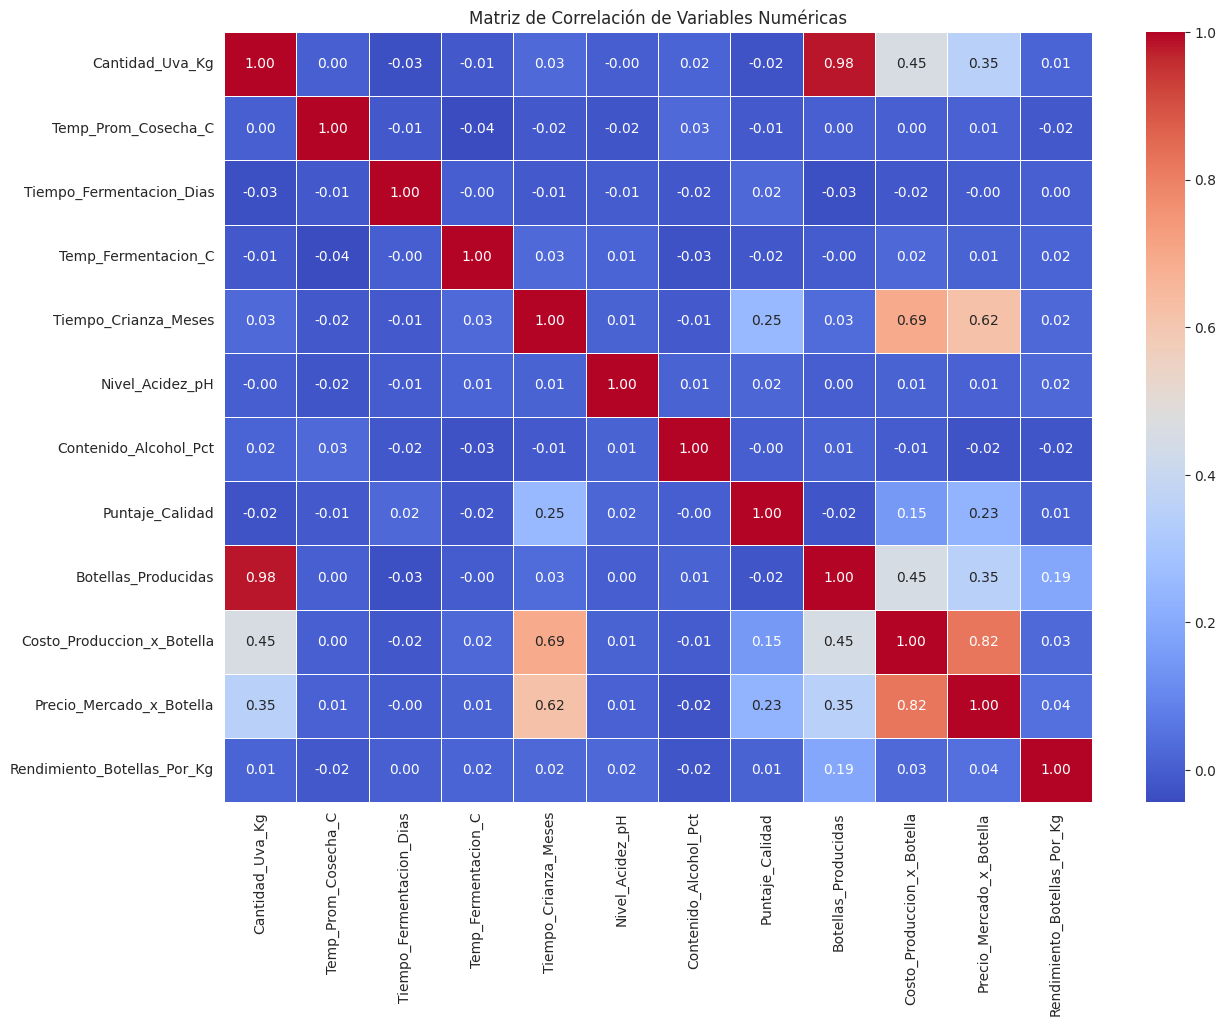

In [30]:
print("\n--- 3.c Matriz de Correlación (Variables Numéricas) ---")

# Seleccionar solo columnas numéricas para la matriz de correlación
df_numeric = df_cleaned.select_dtypes(include=np.number)

# Eliminar ID_Lote si no es relevante para la correlación de negocio
if 'ID_Lote' in df_numeric.columns:
    df_numeric = df_numeric.drop(columns=['ID_Lote'])

plt.figure(figsize=(14, 10))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

Observaciones esperadas:
*   Puntaje_Calidad con Tiempo_Crianza_Meses.
*   Costo_Produccion_x_Botella con Tiempo_Crianza_Meses y Cantidad_Uva_Kg.
*   Costo_Produccion_x_Botella con Tiempo_Crianza_Meses y Cantidad_Uva_Kg.
*   Precio_Mercado_x_Botella con Puntaje_Calidad, Costo_Produccion_x_Botella, Tiempo_Crianza_Meses.
*   Botellas_Producidas con Cantidad_Uva_Kg.
*   Correlación negativa de Puntaje_Calidad con abs(Temp_Fermentacion_C - 25).

## 5.d. Análisis Temporal

*   Extraer año/mes de Fecha_Produccion.
*   Ver tendencias de Puntaje_Calidad o Botellas_Producidas a lo largo del tiempo (line plot).


--- 3.d Análisis Temporal (Ejemplo con Puntaje_Calidad) ---


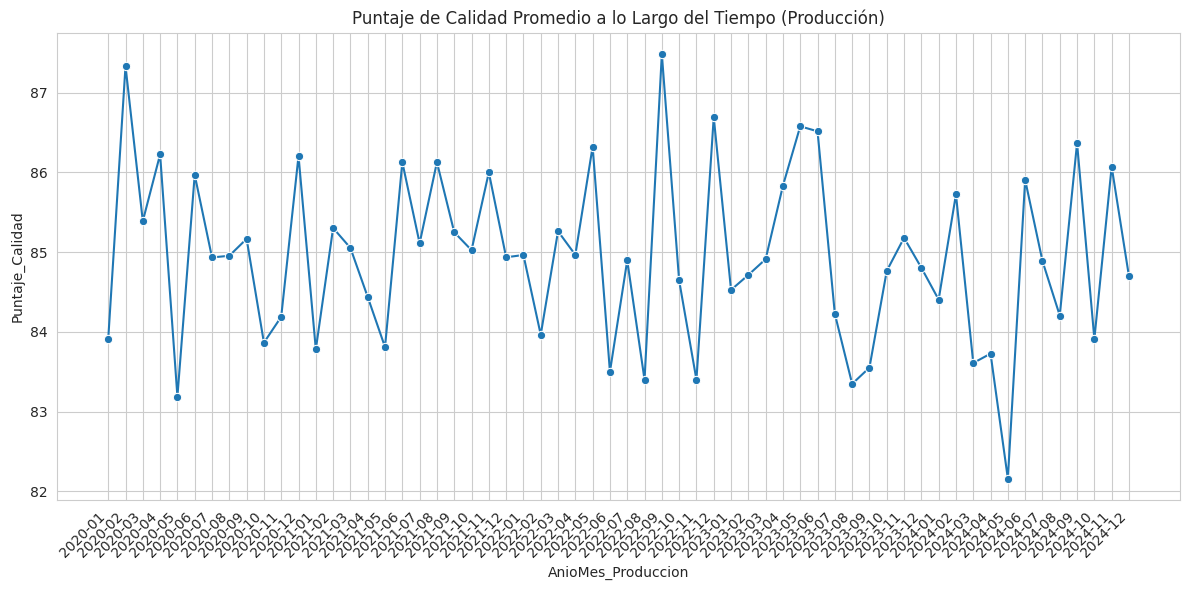

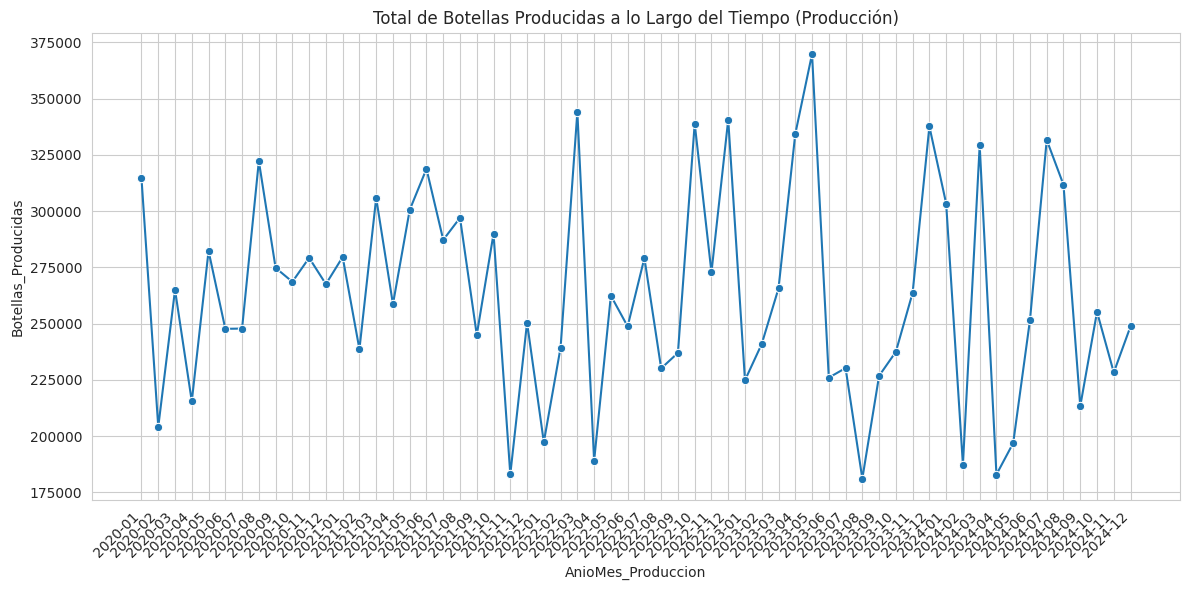

In [31]:
print("\n--- 3.d Análisis Temporal (Ejemplo con Puntaje_Calidad) ---")

df_cleaned['Anio_Produccion'] = df_cleaned['Fecha_Produccion'].dt.year
df_cleaned['Mes_Produccion'] = df_cleaned['Fecha_Produccion'].dt.month
df_cleaned['AnioMes_Produccion'] = df_cleaned['Fecha_Produccion'].dt.to_period('M')

# Puntaje de Calidad promedio por Año-Mes
calidad_temporal = df_cleaned.groupby('AnioMes_Produccion')['Puntaje_Calidad'].mean().reset_index()
calidad_temporal['AnioMes_Produccion'] = calidad_temporal['AnioMes_Produccion'].astype(str) # Para mejor ploteo

plt.figure(figsize=(12, 6))
sns.lineplot(x='AnioMes_Produccion', y='Puntaje_Calidad', data=calidad_temporal, marker='o')
plt.title('Puntaje de Calidad Promedio a lo Largo del Tiempo (Producción)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Botellas producidas por Año-Mes
produccion_temporal = df_cleaned.groupby('AnioMes_Produccion')['Botellas_Producidas'].sum().reset_index()
produccion_temporal['AnioMes_Produccion'] = produccion_temporal['AnioMes_Produccion'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(x='AnioMes_Produccion', y='Botellas_Producidas', data=produccion_temporal, marker='o')
plt.title('Total de Botellas Producidas a lo Largo del Tiempo (Producción)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Observaciones esperadas:

*   Dado que los datos son generados aleatoriamente dentro de un rango de fechas y no hay una tendencia temporal intrínseca diseñada (aparte de la aleatoriedad de las fechas de producción), no deberíamos esperar ver tendencias fuertes a menos que surjan por azar. Sería más interesante si los datos fueran reales o si hubiéramos introducido factores estacionales o de tendencia en la generación.

# Paso 6: Recomendaciones con Base en Insights Observados

*(Esta sección se completaría después de ejecutar y analizar los resultados del EDA. Aquí pongo ejemplos de cómo podrían ser algunas recomendaciones, asumiendo ciertos resultados del EDA que son probables dada la generación de datos).*

*   Foco en la Crianza para Calidad Premium:
  *   Insight Observado (Hipotético): Se observa una fuerte correlación positiva entre Tiempo_Crianza_Meses (especialmente en barricas de roble) y Puntaje_Calidad. Los vinos 'Super Premium' consistentemente muestran mayores tiempos de crianza.
  *   Recomendación: Para bodegas que buscan alcanzar categorías 'Premium' o 'Super Premium', invertir en programas de crianza más prolongados utilizando barricas de roble (francés o americano, según sutiles diferencias que el EDA pueda revelar) parece ser una estrategia efectiva. Se debe balancear con el aumento de costos asociado.


*   Optimización de la Temperatura de Fermentación:
  *   Insight Observado (Hipotético): El Puntaje_Calidad muestra un pico alrededor de los 25°C de Temp_Fermentacion_C, disminuyendo si la temperatura es muy alta o muy baja.
  *   Recomendación: Mantener un control estricto de la temperatura de fermentación, apuntando a un rango óptimo (ej. 24-26°C), puede contribuir a mejorar consistentemente la calidad sin incurrir necesariamente en altos costos adicionales (más allá del control de temperatura).


*   Segmentación por Tipo de Uva y Región:
  *   Insight Observado (Hipotético): Ciertas combinaciones de Tipo_Uva y Region (ej. Malbec de Mendoza, Cabernet Sauvignon de Salta) tienden a obtener puntajes más altos de forma consistente.
  *   Recomendación: Las bodegas podrían especializarse o enfocar sus esfuerzos de marketing en estas combinaciones de alto rendimiento, destacando su origen y variedad como sellos de calidad.



*   Elemento de lista
*   Elemento de lista







# Paso 6: Modelado

Ahora vamos a profundizar en la aplicación práctica para predecir Categoria_Calidad.

Para predecir Categoria_Calidad, estamos tratando con un problema de Aprendizaje Supervisado, específicamente un problema de Clasificación Multiclase.

Supervisado: Porque tenemos datos históricos (df_cleaned) donde conocemos tanto las características de entrada (features como Tipo_Uva, Tiempo_Crianza_Meses, etc.) como la etiqueta de salida correcta (Categoria_Calidad: 'Standard', 'Premium', 'Super Premium') para cada observación (lote de vino). El modelo aprenderá una función que mapea las entradas a la salida observada.

Clasificación: Porque la variable objetivo (Categoria_Calidad) es categórica, con un número finito de clases discretas.

Multiclase: Porque hay más de dos posibles categorías de salida ('Standard', 'Premium', 'Super Premium').

Objetivo del Modelo:
Construir un modelo que, dadas las características de un lote de vino (antes o durante su producción), pueda predecir a cuál de las tres categorías de calidad (Standard, Premium, Super Premium) es más probable que pertenezca.

## 6.a Selección de Características (Features - X) y Variable Objetivo (Target - y)

In [34]:
y = df_cleaned['Categoria_Calidad']

# Selección de features (ejemplo para predicción prospectiva de calidad)
features_categoricas = ['Region', 'Tipo_Uva', 'Clima_Cosecha', 'Tipo_Barrica']
features_numericas = [
    'Cantidad_Uva_Kg', 'Temp_Prom_Cosecha_C', 'Tiempo_Fermentacion_Dias',
    'Temp_Fermentacion_C', 'Tiempo_Crianza_Meses', 'Nivel_Acidez_pH',
    'Contenido_Alcohol_Pct', 'Botellas_Producidas', 'Costo_Produccion_x_Botella', # Asumimos que el costo se estima/conoce
]
X = df_cleaned[features_numericas + features_categoricas]

## 6.b Preprocesamiento de Datos

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Definir el preprocesador
# Las features numéricas se escalarán
# Las features categóricas se codificarán con One-Hot Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore'), features_categoricas) # handle_unknown='ignore' es útil si aparecen nuevas categorías en test
    ])

# Dividir datos ANTES de aplicar el preprocesador que se ajusta solo en train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
# stratify=y es importante en clasificación para mantener la proporción de clases en train y test

print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"\nDistribución de clases en y_train:\n{y_train.value_counts(normalize=True)}")
print(f"\nDistribución de clases en y_test:\n{y_test.value_counts(normalize=True)}")

Tamaño de X_train: (1575, 13)
Tamaño de X_test: (525, 13)

Distribución de clases en y_train:
Categoria_Calidad
Standard         0.477460
Premium          0.399365
Super Premium    0.123175
Name: proportion, dtype: float64

Distribución de clases en y_test:
Categoria_Calidad
Standard         0.47619
Premium          0.40000
Super Premium    0.12381
Name: proportion, dtype: float64


## 6.c Selección y Entrenamiento del Modelo

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder
# from xgboost import XGBClassifier # Descomentar si tienes XGBoost instalado

# --- Modelo 1: Regresión Logística ---
pipeline_logreg = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', OneVsRestClassifier(LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)))])
pipeline_logreg.fit(X_train, y_train)
print("Regresión Logística entrenada.")

# --- Modelo 2: Random Forest ---
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])
pipeline_rf.fit(X_train, y_train)
print("Random Forest entrenado.")

# --- Modelo 3: XGBoost (opcional) ---
# Necesitas tener XGBoost instalado: pip install xgboost
# from xgboost import XGBClassifier
# # Para XGBoost, las etiquetas categóricas deben ser numéricas (0, 1, 2)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train) # Ajustar y transformar en y_train
y_test_encoded = le.transform(y_test)     # Solo transformar en y_test

# pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor),
#                                  ('classifier', XGBClassifier(objective='multi:softmax', num_class=len(le.classes_), random_state=42, use_label_encoder=False, eval_metric='mlogloss'))])
# pipeline_xgb.fit(X_train, y_train_encoded) # Usar y_train_encoded
# print("XGBoost entrenado.")

# Nota: Si usas XGBoost con y_train (categórico), algunos wrappers más nuevos pueden manejarlo,
# pero es más seguro y tradicional codificar 'y' para XGBoost.
# El LabelEncoder 'le' será útil para decodificar predicciones si es necesario.

Regresión Logística entrenada.
Random Forest entrenado.


## 6.d Evaluación del Modelo


--- Evaluación para: Regresión Logística ---
Accuracy en Train: 0.5124
Accuracy en Test: 0.4705

Reporte de Clasificación en Test:
               precision    recall  f1-score   support

      Premium       0.41      0.33      0.37       210
     Standard       0.51      0.70      0.59       250
Super Premium       0.18      0.03      0.05        65

     accuracy                           0.47       525
    macro avg       0.37      0.35      0.34       525
 weighted avg       0.43      0.47      0.43       525

Matriz de Confusión en Test:


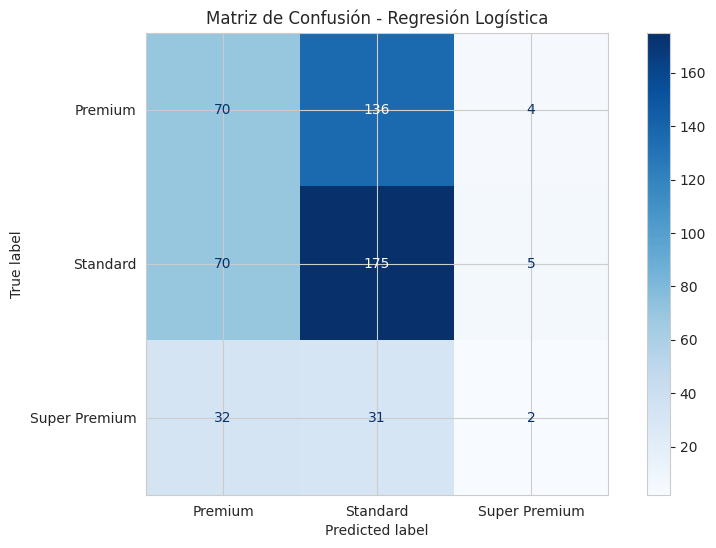


--- Evaluación para: Random Forest ---
Accuracy en Train: 1.0000
Accuracy en Test: 0.4133

Reporte de Clasificación en Test:
               precision    recall  f1-score   support

      Premium       0.34      0.29      0.31       210
     Standard       0.45      0.62      0.52       250
Super Premium       0.29      0.03      0.06        65

     accuracy                           0.41       525
    macro avg       0.36      0.31      0.30       525
 weighted avg       0.39      0.41      0.38       525

Matriz de Confusión en Test:


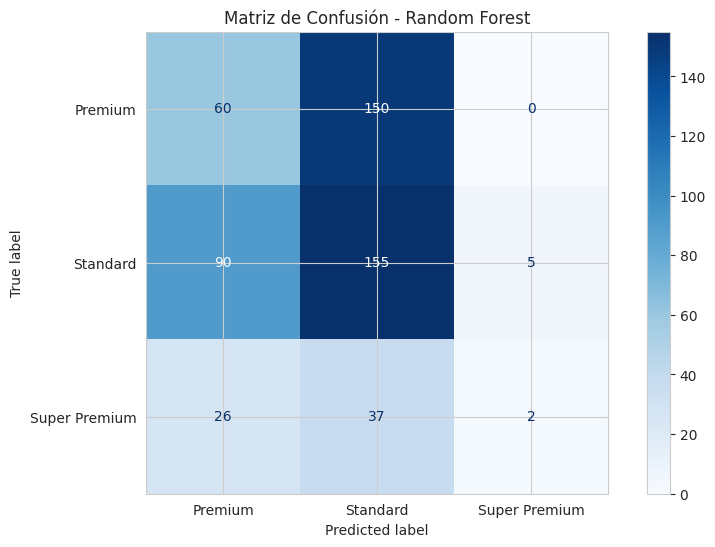

In [49]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

models = {
    "Regresión Logística": pipeline_logreg,
    "Random Forest": pipeline_rf,
    # "XGBoost": pipeline_xgb # Descomentar si se entrenó
}

# Para XGBoost, las predicciones también serían numéricas y necesitarían decodificarse
# y_target_for_xgb_eval = y_test_encoded
# y_target_for_other_eval = y_test

for model_name, model_pipeline in models.items():
    print(f"\n--- Evaluación para: {model_name} ---")

    # Determinar el target correcto para la evaluación
    # current_y_test = y_test_encoded if model_name == "XGBoost" else y_test
    # current_y_train = y_train_encoded if model_name == "XGBoost" else y_train # Para score en train
    current_y_test = y_test # Usaremos y_test (categórico) para todos por simplicidad aquí,
                            # sklearn usualmente maneja bien esto para classification_report.
                            # Si XGBoost se entrenó con y_encoded, sus predicciones serán numéricas.
                            # Para una comparación justa, las predicciones de XGB deberían decodificarse antes de classification_report
                            # o y_test debería codificarse.

    y_pred_train = model_pipeline.predict(X_train)
    y_pred_test = model_pipeline.predict(X_test)

    # Si el modelo es XGB y predice números, decodificar
    # if model_name == "XGBoost":
    #     y_pred_train = le.inverse_transform(y_pred_train)
    #     y_pred_test = le.inverse_transform(y_pred_test)

    print(f"Accuracy en Train: {accuracy_score(y_train, y_pred_train):.4f}") # Usar y_train original
    print(f"Accuracy en Test: {accuracy_score(current_y_test, y_pred_test):.4f}")

    print("\nReporte de Clasificación en Test:")
    # Asegurarse que las etiquetas de target_names coincidan con las clases en y_test
    # Si y_test es categórico, y las predicciones también (o se decodificaron), está bien.
    # Si y_test es numérico (para XGB) y las preds son numéricas, necesitaríamos le.classes_
    class_labels = le.classes_ if 'le' in globals() and isinstance(y_test.iloc[0], (int, np.integer)) else sorted(y_test.unique())

    print(classification_report(current_y_test, y_pred_test, target_names=class_labels))

    print("Matriz de Confusión en Test:")
    cm = confusion_matrix(current_y_test, y_pred_test, labels=class_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Matriz de Confusión - {model_name}")
    plt.show()

## 6.e Optimización de Hiperparámetros (Ejemplo Conceptual)

In [40]:
from sklearn.model_selection import GridSearchCV

# Ejemplo para Random Forest (se haría después de la evaluación inicial)
# param_grid_rf = {
#     'classifier__n_estimators': [100, 200, 300],
#     'classifier__max_depth': [None, 10, 20, 30],
#     'classifier__min_samples_split': [2, 5, 10],
#     'classifier__min_samples_leaf': [1, 2, 4]
# }

# # CV se hace sobre el conjunto de entrenamiento original
# grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
# # grid_search_rf.fit(X_train, y_train) # Usar y_train original

# # print(f"Mejores parámetros para Random Forest: {grid_search_rf.best_params_}")
# # best_rf_model = grid_search_rf.best_estimator_
# # y_pred_test_best_rf = best_rf_model.predict(X_test)
# # print("\nReporte de Clasificación en Test (Random Forest Optimizado):")
# # print(classification_report(y_test, y_pred_test_best_rf, target_names=sorted(y_test.unique())))

## 6.f Interpretación del Modelo y Feature Importance

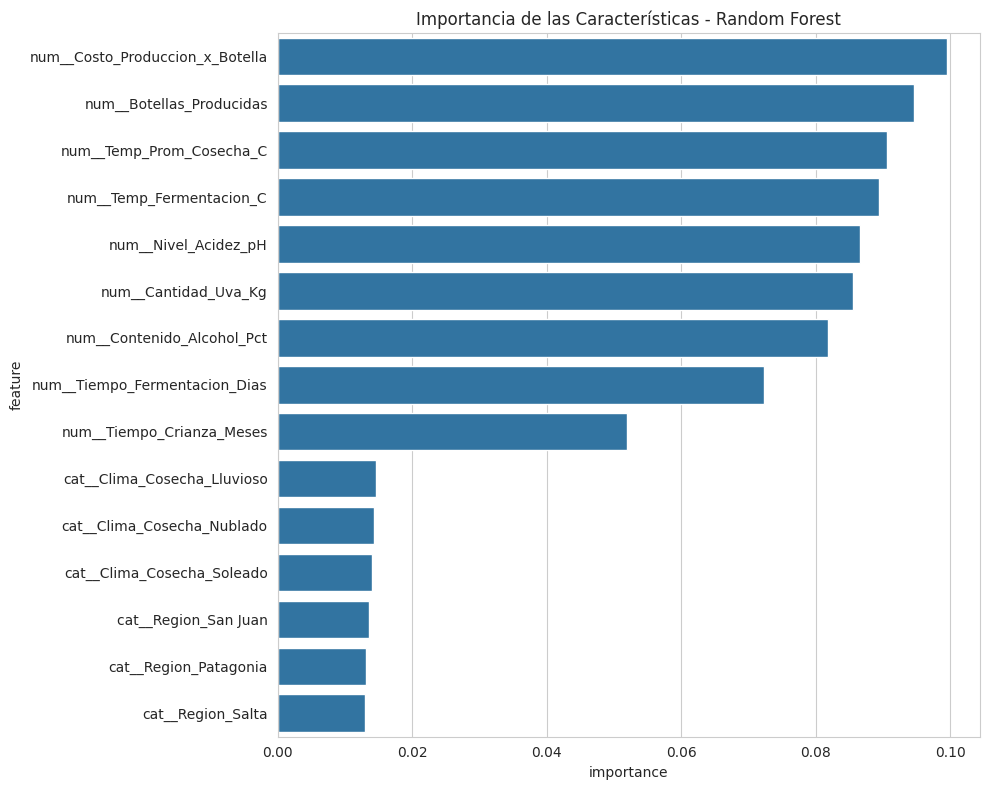


Top 10 Características más importantes (Random Forest):
| feature                         |   importance |
|:--------------------------------|-------------:|
| num__Costo_Produccion_x_Botella |    0.0994855 |
| num__Botellas_Producidas        |    0.0947005 |
| num__Temp_Prom_Cosecha_C        |    0.0905832 |
| num__Temp_Fermentacion_C        |    0.0894376 |
| num__Nivel_Acidez_pH            |    0.0866364 |
| num__Cantidad_Uva_Kg            |    0.0856267 |
| num__Contenido_Alcohol_Pct      |    0.081864  |
| num__Tiempo_Fermentacion_Dias   |    0.0723123 |
| num__Tiempo_Crianza_Meses       |    0.0519773 |
| cat__Clima_Cosecha_Lluvioso     |    0.0145823 |


In [41]:
# Esto se hace después de ajustar el preprocesador y el modelo
# Necesitamos obtener los nombres de las features después del OneHotEncoding

# Ajustar el preprocesador solo en X_train para obtener los nombres transformados
pipeline_rf.named_steps['preprocessor'].fit(X_train, y_train)
feature_names_transformed = pipeline_rf.named_steps['preprocessor'].get_feature_names_out()

# Obtener importancias del modelo Random Forest ajustado
importances = pipeline_rf.named_steps['classifier'].feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': feature_names_transformed,
    'importance': importances
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15)) # Top 15 features
plt.title('Importancia de las Características - Random Forest')
plt.tight_layout()
plt.show()

print("\nTop 10 Características más importantes (Random Forest):")
print(feature_importance_df.head(10).to_markdown(index=False))

Resumen del Paso 6 y Consideraciones Adicionales:

Definición del Problema: Claramente un problema de clasificación supervisada multiclase.

Preparación de Datos: Es crucial. La selección de features, la codificación de categóricas y el escalado de numéricas son pasos estándar. La división train/test estratificada previene el sesgo en la evaluación.

Modelos: Se propusieron Regresión Logística, Random Forest (y opcionalmente XGBoost). Estos cubren desde un baseline simple hasta modelos de ensamblado más complejos.

Métricas de Evaluación: Accuracy es una métrica general, pero classification_report (con precision, recall, F1-score por clase) y la matriz de confusión son mucho más informativas para problemas multiclase, especialmente si hay desbalance de clases (aunque stratify ayuda a mitigarlo en la división).

Feature Importance: Ayuda a entender qué factores está usando más el modelo para tomar sus decisiones, lo cual puede retroalimentar el entendimiento del negocio.

Optimización: GridSearchCV o RandomizedSearchCV son herramientas estándar para afinar los modelos.

Iteración: El modelado es un proceso iterativo. Se prueban diferentes features, modelos, preprocesamientos e hiperparámetros hasta alcanzar un rendimiento satisfactorio o hasta que el beneficio marginal de la mejora sea pequeño.

Despliegue (Fuera de Alcance Aquí): Si el modelo es bueno, el siguiente paso sería pensar en cómo desplegarlo para que pueda hacer predicciones sobre nuevos datos.

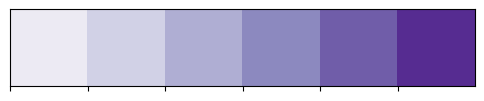

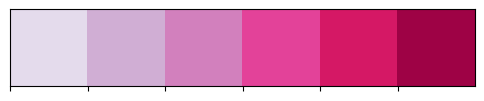

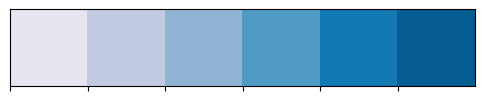

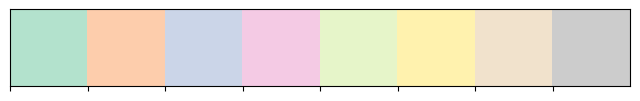

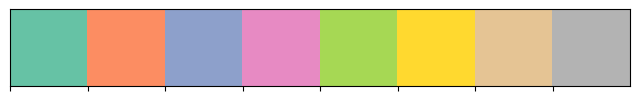

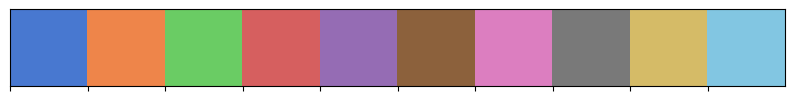

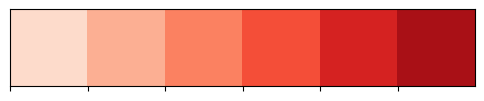

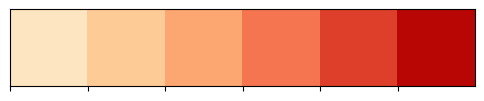

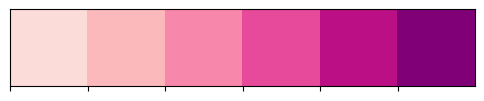

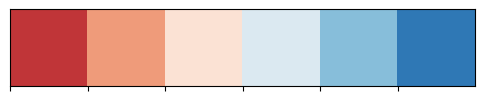

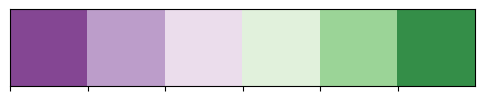

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Paletas moradas
sns.palplot(sns.color_palette("Purples"))
sns.palplot(sns.color_palette("PuRd"))
sns.palplot(sns.color_palette("PuBu"))
sns.palplot(sns.color_palette("Pastel2"))
sns.palplot(sns.color_palette("Set2"))
sns.palplot(sns.color_palette("muted", 10)) # Ejemplo con variación de tab10

# Paletas bordo
sns.palplot(sns.color_palette("Reds"))
sns.palplot(sns.color_palette("OrRd"))
sns.palplot(sns.color_palette("RdPu"))
sns.palplot(sns.color_palette("RdBu"))
sns.palplot(sns.color_palette("PRGn"))

plt.show()

Muestra de colores de la paleta RdPu:
Color 1: RGB=(0.9931103421760862, 0.8893963860053825, 0.8771549404075356), Hex=#fde3e0
Color 2: RGB=(0.9891887735486352, 0.7982929642445213, 0.7805920799692426), Hex=#fcccc7
Color 3: RGB=(0.9830065359477124, 0.673202614379085, 0.7241830065359477), Hex=#fbacb9
Color 4: RGB=(0.9739792387543252, 0.5059592464436755, 0.6670511341791618), Hex=#f881aa
Color 5: RGB=(0.922245290272972, 0.31507881584006153, 0.6135332564398308), Hex=#eb509c
Color 6: RGB=(0.8052287581699347, 0.13725490196078433, 0.5594771241830065), Hex=#cd238f
Color 7: RGB=(0.6327720107650904, 0.00392156862745098, 0.487443291041907), Hex=#a1017c
Color 8: RGB=(0.45507112648981163, 0.0034448289119569397, 0.46046905036524416), Hex=#740175


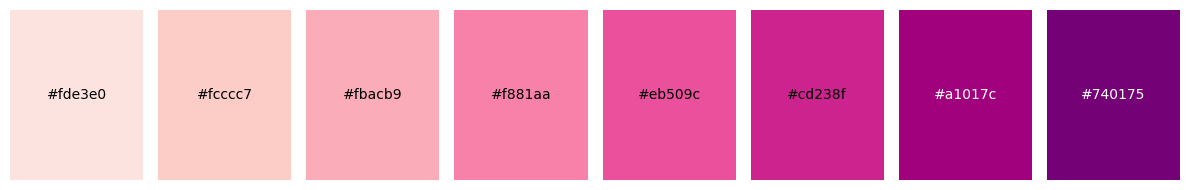

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Obtener una muestra de la paleta "RdPu" (puedes ajustar el número de colores)
n_colors = 8
palette_rdpu = sns.color_palette("RdPu", n_colors=n_colors)

fig, axes = plt.subplots(nrows=1, ncols=n_colors, figsize=(12, 2))

print("Muestra de colores de la paleta RdPu:")
for i, color_rgb in enumerate(palette_rdpu):
    color_hex = mcolors.rgb2hex(color_rgb)
    axes[i].set_facecolor(color_rgb)
    axes[i].text(0.5, 0.5, color_hex, ha='center', va='center', color='black' if sum(color_rgb) > 1.5 else 'white')
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    print(f"Color {i+1}: RGB={color_rgb}, Hex={color_hex}")

plt.tight_layout()
plt.show()